In [3]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context('talk')
%matplotlib inline

from helpers import *

%load_ext autoreload
%autoreload 2

In [500]:
# parameterize this into a general purpose file mover renamer etc? or just learn bash?
## softmax classifier 0 -> softmax classifier 1 (vgg_lenet, vgg_mp_sc_16)
from shutil import copyfile, move

# sortd = 'betasoftmax'
# sortd = 'reversebetasoftmax'
sortd = 'random'

for i in range(0,6):
#     mani_dirs = [
#         '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_{}/'.format(i,j,sortd)
#     for j in range(11,13)]
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_{}/'.format(i,j,sortd)
    for j in [1,4,8,13]]
    for md in mani_dirs:
        files = os.listdir(md)
        Softmaxes = [p for p in files if match_strings(['classifier_0_Softmax('], p)]
        template = files[0]

        for og_file in Softmaxes:
            og_file_path = os.path.join(md, og_file)
            print(og_file_path)
            dest = og_file.replace('classifier_0', 'classifier_1')
            dest = os.path.join(md, dest)
    #             print(dest)
            copyfile(og_file_path, dest)
            os.remove(og_file_path)

In [501]:
# parameterize this into a general purpose file mover renamer etc? or just learn bash?
## softmax classifier 0 -> softmax classifier 1 (vgg_lenet, vgg_mp_sc_16)
from shutil import copyfile, move

# sortd = 'betasoftmax'
# sortd = 'reversebetasoftmax'
sortd = 'random'

for i in range(0,6):
#     mani_dirs = [
#         '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_{}/'.format(i,j,sortd)
#     for j in range(11,13)]
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_{}/'.format(i,j,sortd)
    for j in [1,4,8,13]]
    for md in mani_dirs:
        files = os.listdir(md)
        Softmaxes = [p for p in files if match_strings(['classifier_4_Softmax('], p)]
        template = files[0]

        for og_file in Softmaxes:
            og_file_path = os.path.join(md, og_file)
            print(og_file_path)
            dest = og_file.replace('classifier_4', 'classifier_5')
            dest = os.path.join(md, dest)
    #             print(dest)
            copyfile(og_file_path, dest)
            os.remove(og_file_path)

../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_8-acc_52.34-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_0-acc_0.00-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_4-acc_48.44-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_16-acc_67.97-classifier_4_Softmax(in_features=512,_out_features=50,_bias=True)-featnum_50-.h5
../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1f-formatted_features-sort_random/train-ep_50-acc_8

### VGG1-s training loss

visual network final performance!

In [146]:
LOG_DIR = '../dump/exp_transfer2/logs/'
logs = os.listdir(LOG_DIR)

net_archs = np.unique([catch(log, 'arch') for log in logs]) # vgg1f is vgg1-s, should rename..

log  final loss  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    61.90800   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    65.01568   
2  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    34.51200   
3  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    12.76562   
4  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    33.42000   

                                           full loss  arch  seed imageset  
0  [99.0, 79.36, 78.44, 74.08, 76.32, 79.7, 73.08...  vgg1     2      val  
1  [99.0, 84.1406, 79.2969, 78.5937, 76.7187, 76....  vgg1     2    train  
2  [99.0, 83.76, 72.62, 64.86, 62.2, 57.48, 57.64...  vgg7     5      val  
3  [99.0, 91.25, 78.04679999999999, 69.6092, 64.7...  vgg7     5    train  
4  [99.0, 76.6, 64.62, 58.46, 55.0, 54.16, 50.2, ...  vgg5     5      val

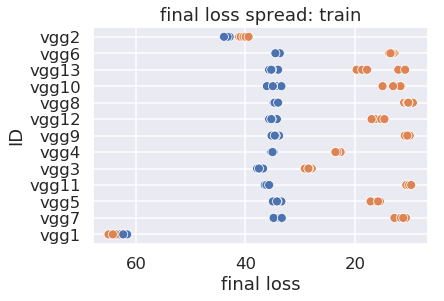

In [147]:
logs_final = []
for log in logs:
    losses = get_losses(LOG_DIR+log, epochs=50)
    losses = np.array([np.insert(losses[1],0,99),np.insert(losses[0],0,99)])
    logs_final.append([log+'-final-imageset_val', np.mean(losses[0][45:-1]), losses[0]])
    logs_final.append([log+'-final-imageset_train', np.mean(losses[1][45:-1]), losses[1]])
    
    
log_df = pd.DataFrame(columns=["log", "final loss", "full loss"], data=logs_final)
log_df['arch'] = log_df['log'].apply(lambda x : str(catch(x, 'arch')))
log_df['seed'] = log_df['log'].apply(lambda x : int(catch(x, 'seed')))
log_df['imageset'] = log_df['log'].apply(lambda x : catch(x, 'imageset'))

ax = sns.scatterplot(x='final loss',y='arch', hue='imageset', legend=False, data=log_df)
ax.invert_xaxis()
ax.set_title('final loss spread: train')
ax.set_ylabel('ID')

log_df.head()

log  final loss  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    61.90800   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...    65.01568   
2  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    34.51200   
3  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    12.76562   
4  seed_5-drop_0-dataset_CIFAR100-classes_50-arch...    33.42000   

                                           full loss  arch  seed imageset  
0  [99.0, 79.36, 78.44, 74.08, 76.32, 79.7, 73.08...  vgg1     2      val  
1  [99.0, 84.1406, 79.2969, 78.5937, 76.7187, 76....  vgg1     2    train  
2  [99.0, 83.76, 72.62, 64.86, 62.2, 57.48, 57.64...  vgg7     5      val  
3  [99.0, 91.25, 78.04679999999999, 69.6092, 64.7...  vgg7     5    train  
4  [99.0, 76.6, 64.62, 58.46, 55.0, 54.16, 50.2, ...  vgg5     5      val

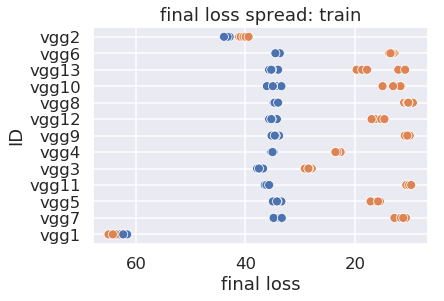

In [8]:
LOG_DIR = '../dump/exp_transfer2/logs/'
logs = os.listdir(LOG_DIR)

net_archs = np.unique([catch(log, 'arch') for log in logs]) # vgg1f is vgg1-s, should rename..

logs_final = []
for log in logs:
    losses = get_losses(LOG_DIR+log, epochs=50)
    losses = np.array([np.insert(losses[1],0,99),np.insert(losses[0],0,99)])
    logs_final.append([log+'-final-imageset_val', np.mean(losses[0][45:-1]), losses[0]])
    logs_final.append([log+'-final-imageset_train', np.mean(losses[1][45:-1]), losses[1]])
    
    
log_df = pd.DataFrame(columns=["log", "final loss", "full loss"], data=logs_final)
log_df['arch'] = log_df['log'].apply(lambda x : str(catch(x, 'arch')))
log_df['seed'] = log_df['log'].apply(lambda x : int(catch(x, 'seed')))
log_df['imageset'] = log_df['log'].apply(lambda x : catch(x, 'imageset'))

ax = sns.scatterplot(x='final loss',y='arch', hue='imageset', legend=False, data=log_df)
ax.invert_xaxis()
ax.set_title('final loss spread: train')
ax.set_ylabel('ID')

log_df.head()

possible issue, logs of varying lengths!
('log:', 'seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg1-log-final-imageset_val')


log  epoch   loss  arch  \
0  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      0  99.00  vgg1   
1  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      1  79.36  vgg1   
2  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      2  78.44  vgg1   
3  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      3  74.08  vgg1   
4  seed_2-drop_0-dataset_CIFAR100-classes_50-arch...      4  76.32  vgg1   

   seed imageset  
0     2      val  
1     2      val  
2     2      val  
3     2      val  
4     2      val

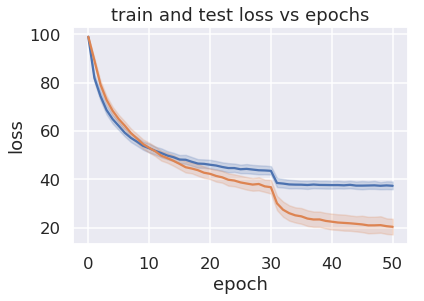

In [9]:
loss = []
for v in logs_final:
    if len(v[-1]) == len(logs_final[0][-1]):
        loss.append([np.tile(v[0], len(v[-1])), np.arange(len(v[-1])).astype(str), np.array(v[-1]).astype(str)])
    else:
        print('possible issue, logs of varying lengths!')
        print('log:', v[0])
    
loss = np.array(loss)
loss = loss.transpose(1,0,2).reshape(3,-1).T

loss_df = pd.DataFrame(columns=["log", "epoch", "loss"], data=loss)

loss_df['arch'] = loss_df['log'].apply(lambda x : str(catch(x, 'arch')))
loss_df['seed'] = loss_df['log'].apply(lambda x : catch(x, 'seed'))
loss_df['imageset'] = loss_df['log'].apply(lambda x : catch(x, 'imageset'))
loss_df['loss'] = pd.to_numeric(loss_df['loss'], errors='coerce')
loss_df['epoch'] = pd.to_numeric(loss_df['epoch'], errors='coerce')
loss_df['seed'] = pd.to_numeric(loss_df['seed'], errors='coerce')

ax = sns.lineplot(x='epoch',y='loss', hue='imageset', legend=False, data=loss_df)
ax.set_title('train and test loss vs epochs')
ax.set_ylabel('loss')


loss_df.head()

In [248]:
df['loss'] = df.apply(lambda x : loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']==x['imageset'])]['loss'].values[0], axis=1)

df['trainacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='train')]['loss'].values[0], axis=1)

df['valacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='val')]['loss'].values[0], axis=1)

### VGG1 measures

In [270]:
def add_loss(df, loss_df):
    df['loss'] = df.apply(lambda x : loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']==x['imageset'])]['loss'].values[0], axis=1)

    df['trainacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='train')]['loss'].values[0], axis=1)

    df['valacc'] = df.apply(lambda x : 100-loss_df[(loss_df['epoch']==x['epoch'])&
                            (loss_df['seed']==x['seed'])&
                            (loss_df['arch']==x['arch'])&
                            (loss_df['imageset']=='val')]['loss'].values[0], axis=1)
    
    return df

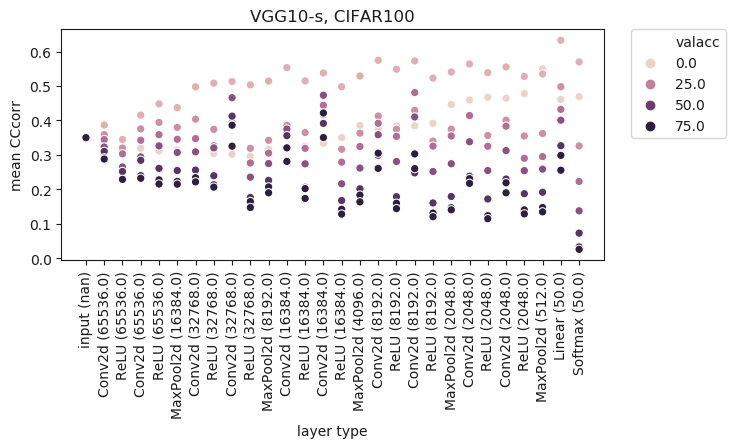

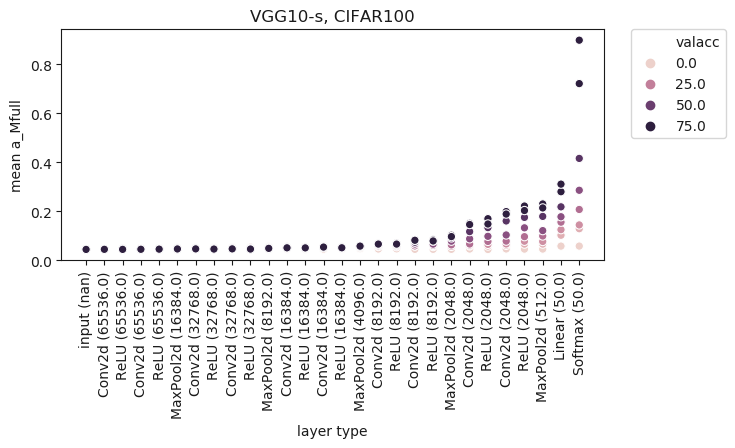

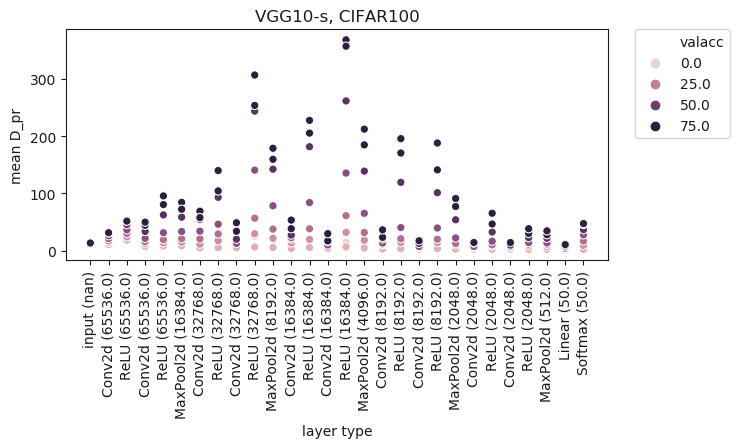

In [685]:
title = 'VGG10-s, CIFAR100'
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'
]

expand_input(mani_dirs)

tags = [ 
    "ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)

df = add_loss(df, loss_df)

df['tag'] = df['tag']+df['epoch'].astype(str)

opts = {
    'dims':[7,3],
    'sortby': ['layer number','epoch'],
    'hue': 'valacc',
    'fix_legend':True
}

df_filtered = df[(df['imageset']=='train')]

for measure in measures:
    data = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)

In [29]:
def fill_input_features(df, input_features=3072):
    df['featnum'] = df['featnum'].fillna(value=input_features)

In [30]:
fill_input_features(df)

In [21]:
df[df['measure']=='D_pr']['value'].values
df[df['measure']=='D_pr']['featnum'].values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 6.5536e+04, 6.5536e+04,
       6.5536e+04, 6.5536e+04, 6.5536e+04, 6.5536e+04, 6.5536e+04,
       6.5536e+04, 6.5536e+04, 6.5536e+04, 6.5536e+04, 6.5536e+04,
       6.5536e+04, 6.5536e+04, 6.5536e+04, 6.5536e+04, 3.2768e+04,
       3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04,
       3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04,
       3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04, 3.2768e+04,
       1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04,
       1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04,
       1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04, 1.6384e+04,
       1.6384e+04, 8.1920e+03, 8.1920e+03, 8.1920e+03, 8.1920e+03,
       8.1920e+03, 8.1920e+03, 8.1920e+03, 8.1920e+03, 8.1920e+03,
       8.1920e+03, 8.1920e+03, 8.1920e+03, 8.1920e+03, 8.1920e+03,
       8.1920e+03, 8.1920e+03, 2.0480e+03, 2.0480e+03, 2.0480e

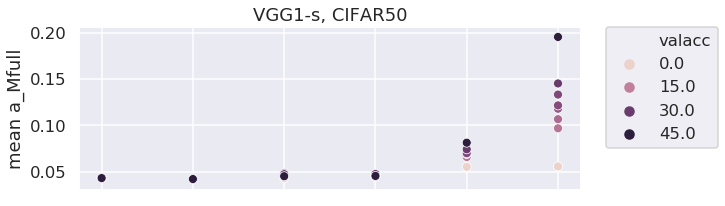

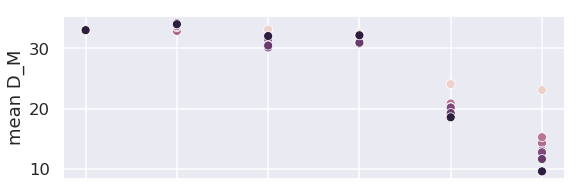

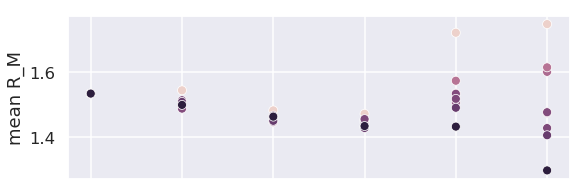

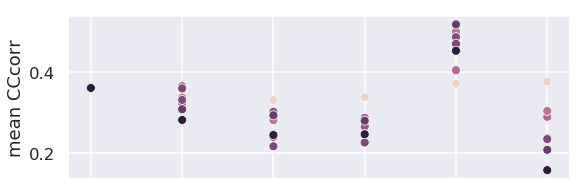

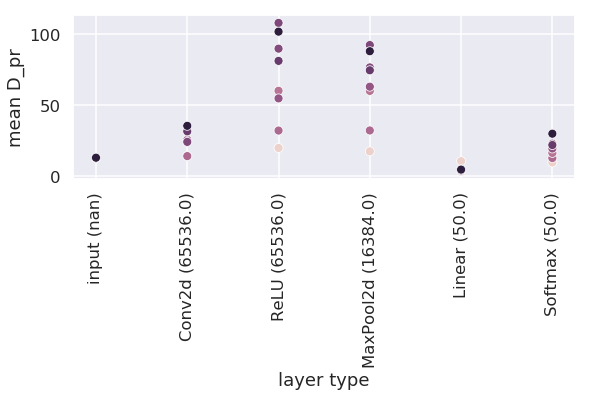

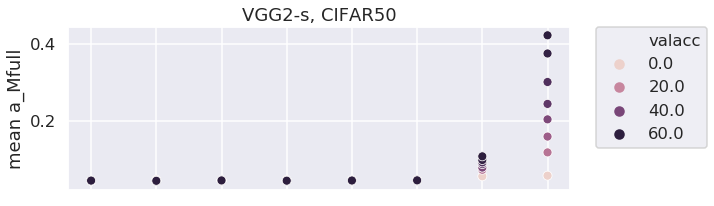

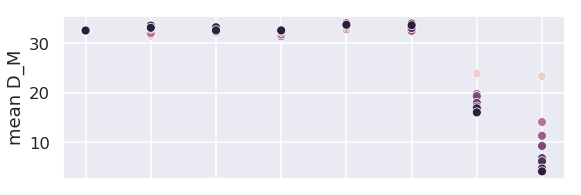

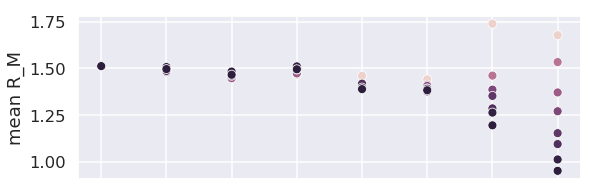

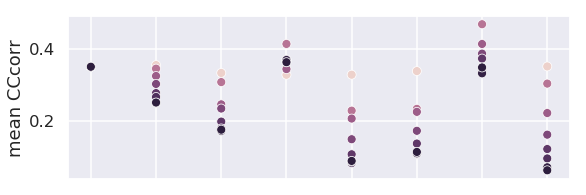

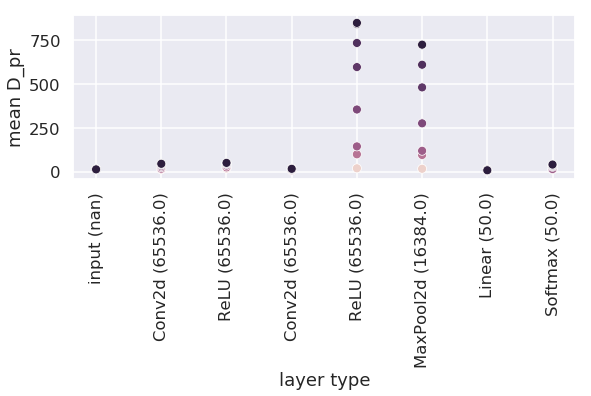

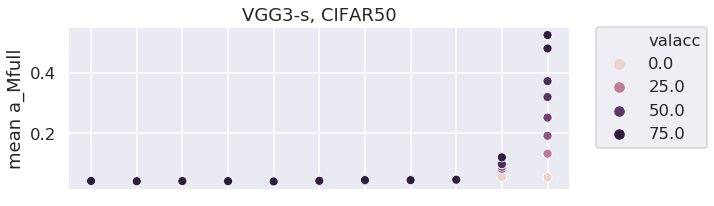

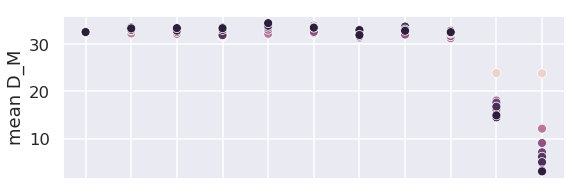

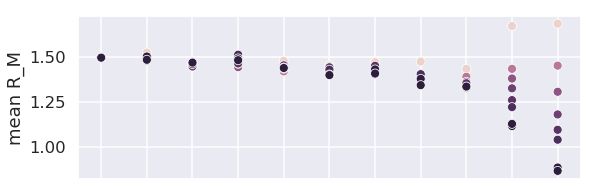

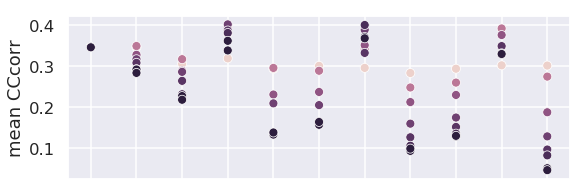

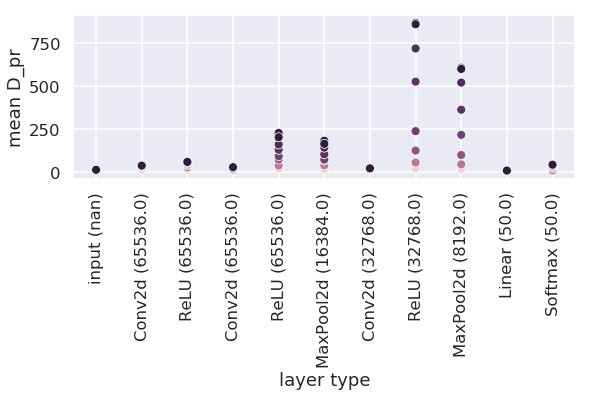

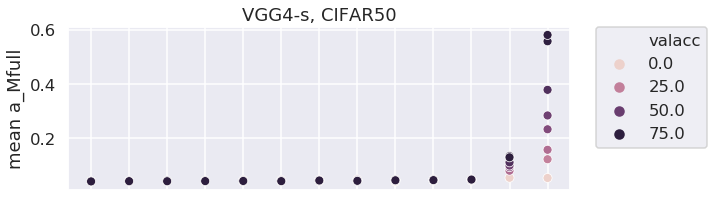

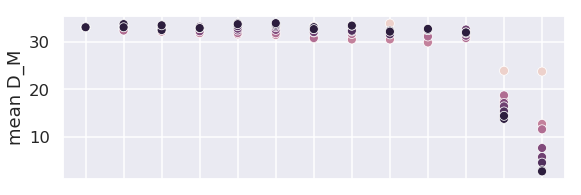

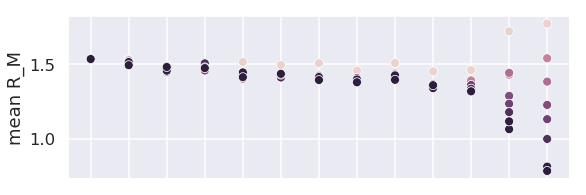

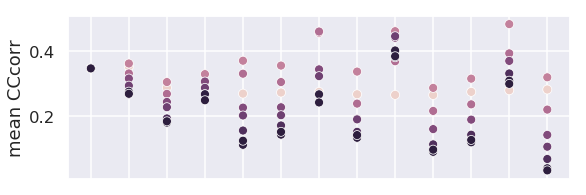

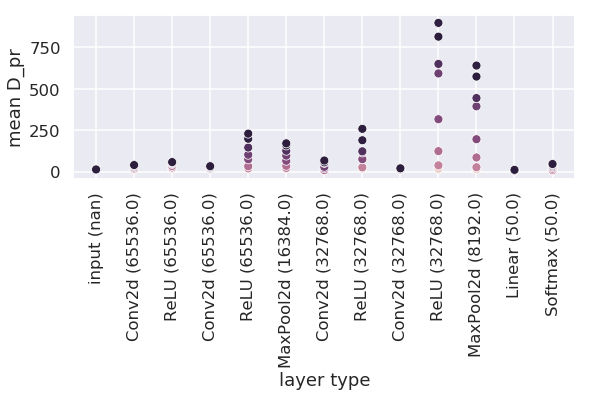

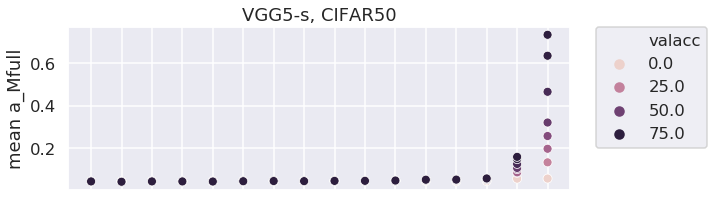

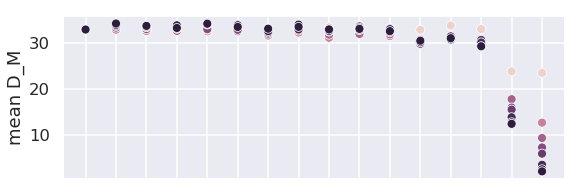

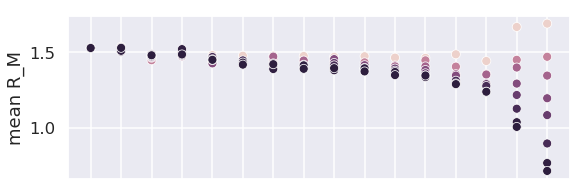

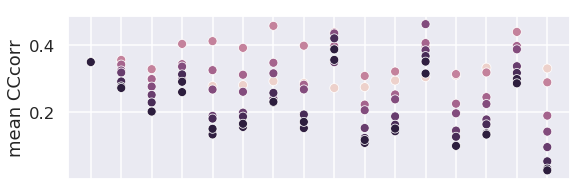

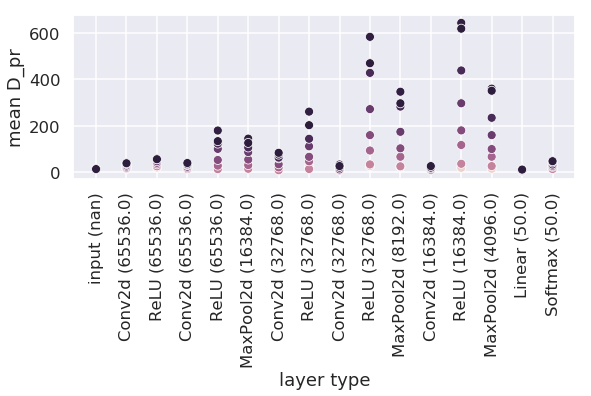

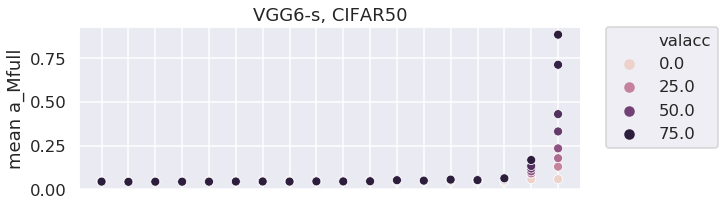

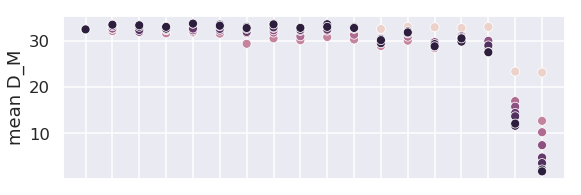

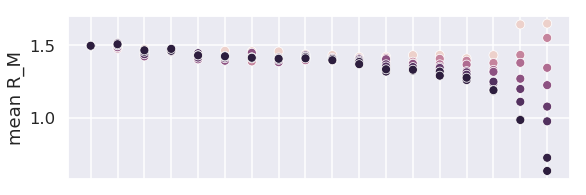

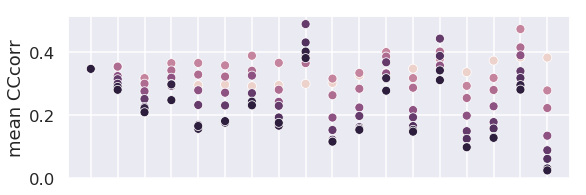

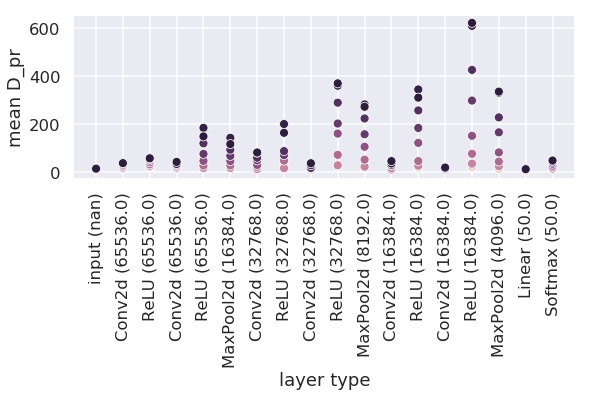

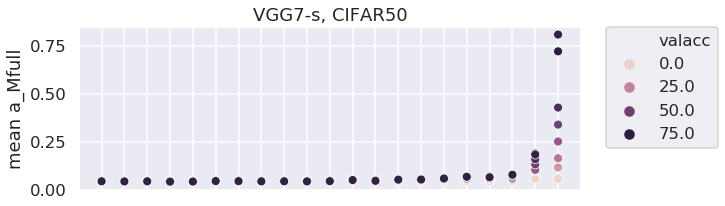

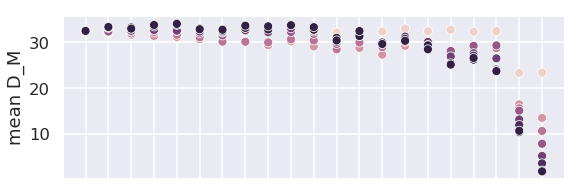

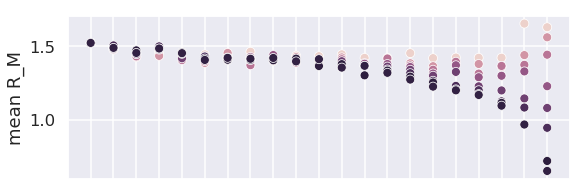

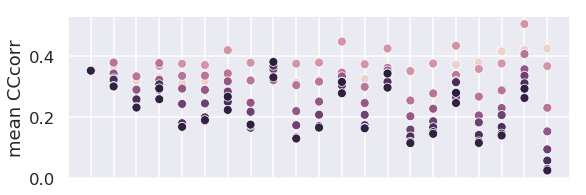

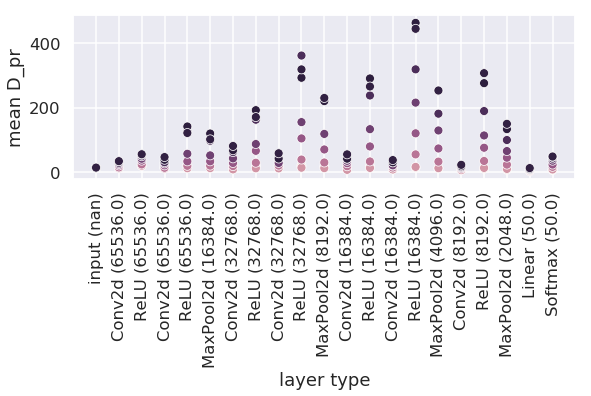

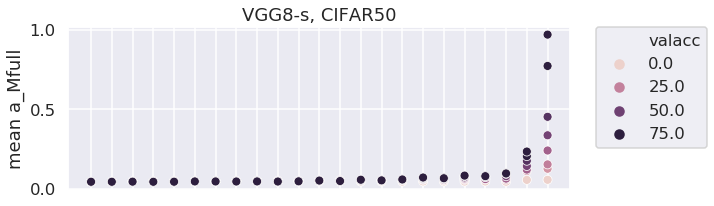

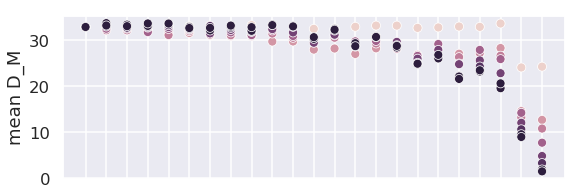

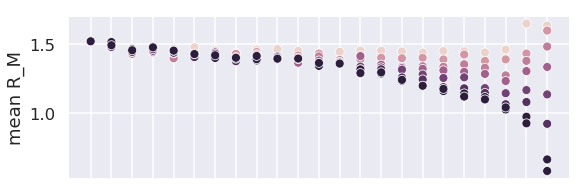

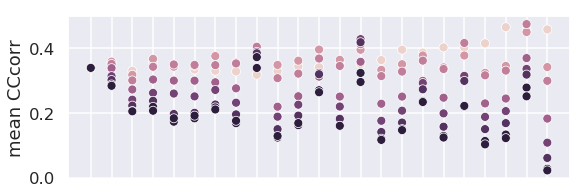

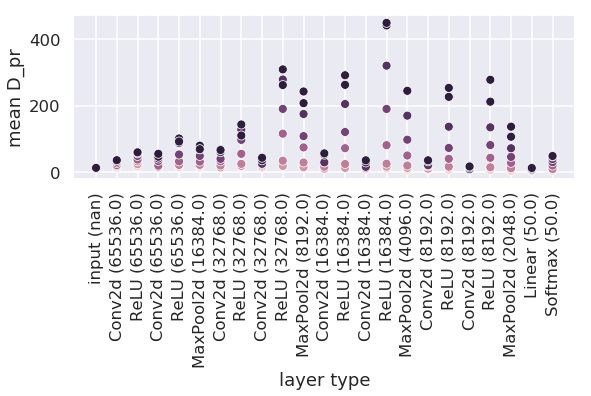

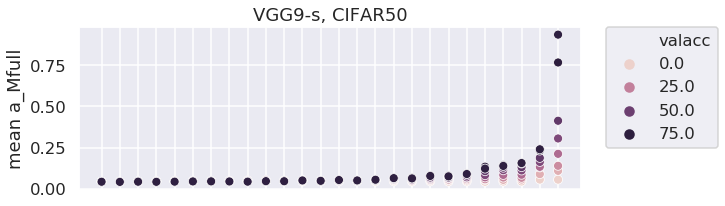

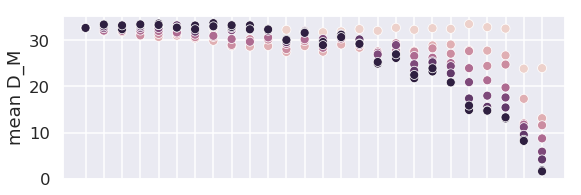

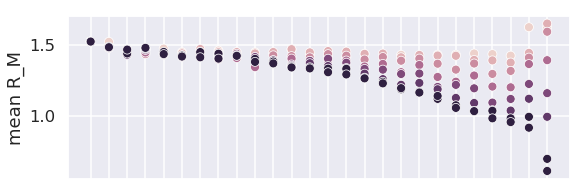

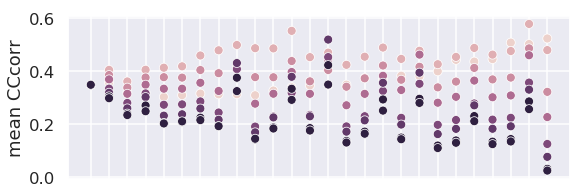

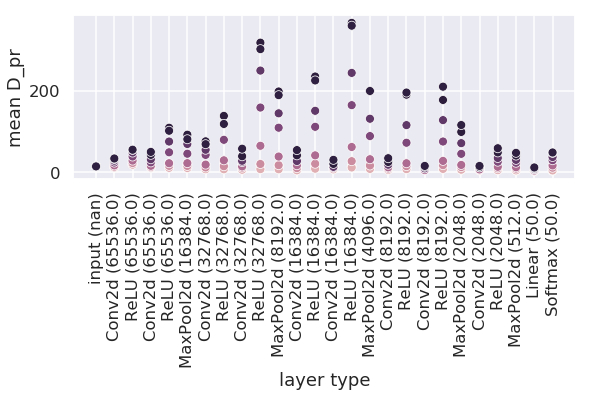

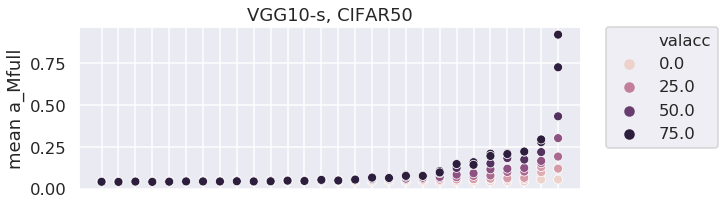

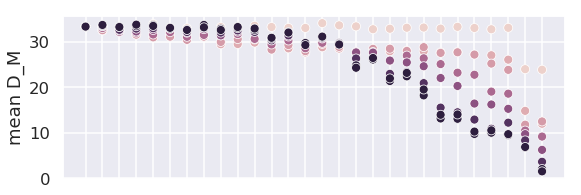

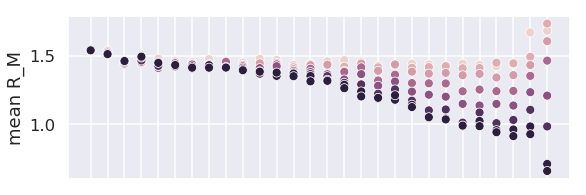

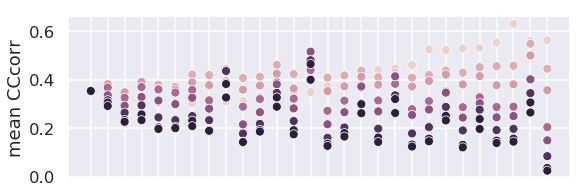

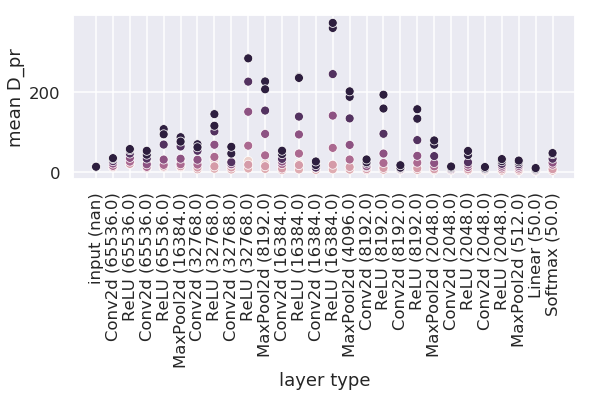

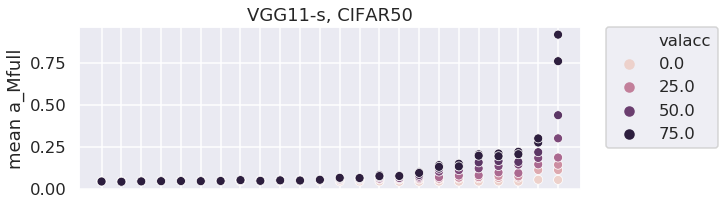

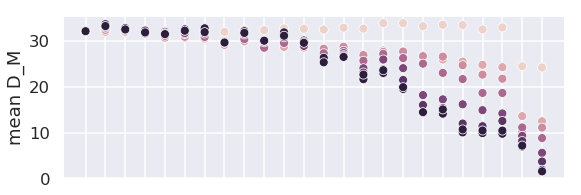

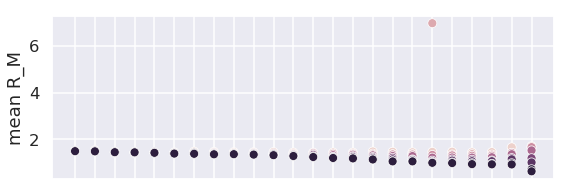

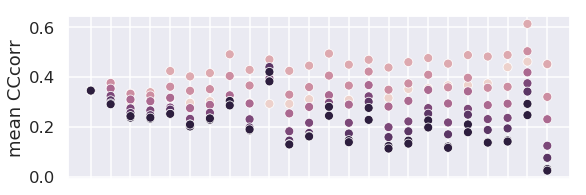

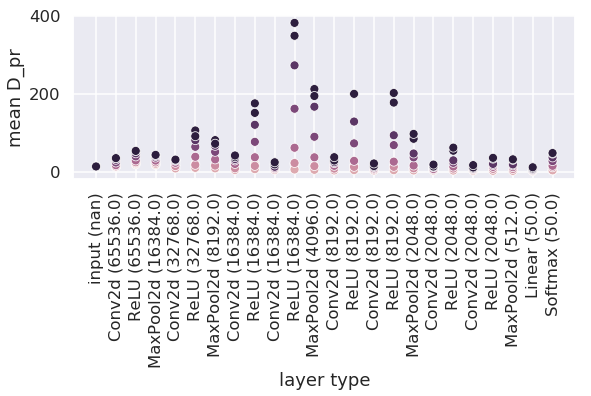

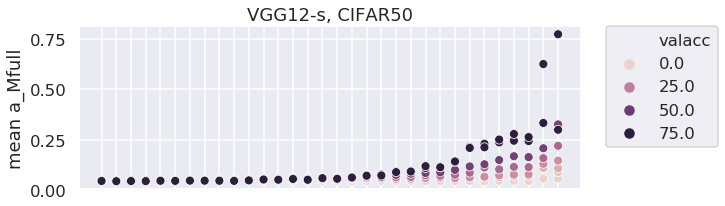

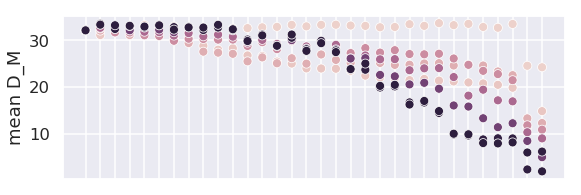

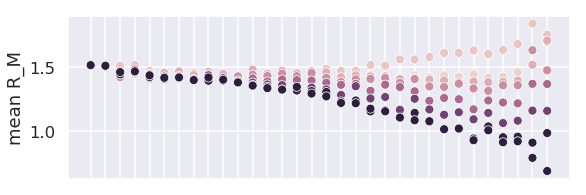

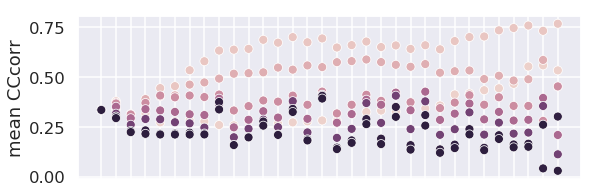

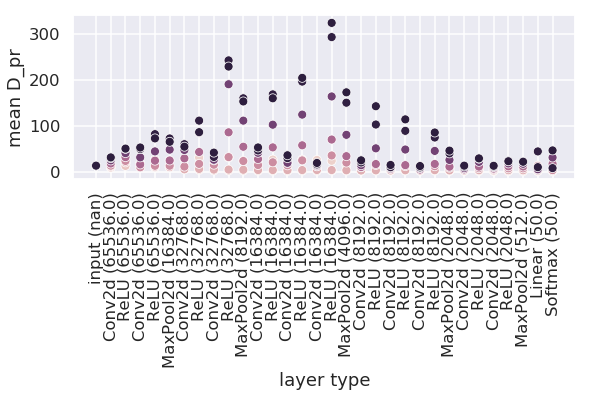

In [492]:
# for i in range(1,13): 
for i in range(1,13): 
    title = 'VGG{}-s, CIFAR50'.format(i)
    measures = ['a_Mfull_vec', 'D_M_vec', 'R_M_vec', 'CCcorr', 'D_pr']
#     measures = ['a_Mfull_vec']

    if i in [4,8,12]:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    elif i in [11]:
        mani_dirs = [
            '../dump/exp_transfer/manifold-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    else:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]

    expand_input(mani_dirs)

    tags = [ 
        "seed 30 ep:" 
    ]

    df = multi_frame_constructor(mani_dirs, tags, measures)
#     df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
    df = add_loss(df,loss_df)

    df['tag'] = df['tag']+df['epoch'].astype(str)

    opts = {
        'dims':[9,3],
        'sortby': ['layer number','epoch'],
        'hue': 'valacc',
        'fix_legend':True
    }

    df['valacc'] = df['valacc'].round(2)#.astype('str')
    
    df_filtered = df[(df['imageset']=='train')]
#     df_filtered = df[(df['imageset']=='train')&(df['epoch']==8)]

    for j, measure in enumerate(measures):
        data, ax = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)
        if j > 0:
            ax.get_legend().remove()
            ax.set_title('')
        if j != len(measures)-1:
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.set_xlabel('')

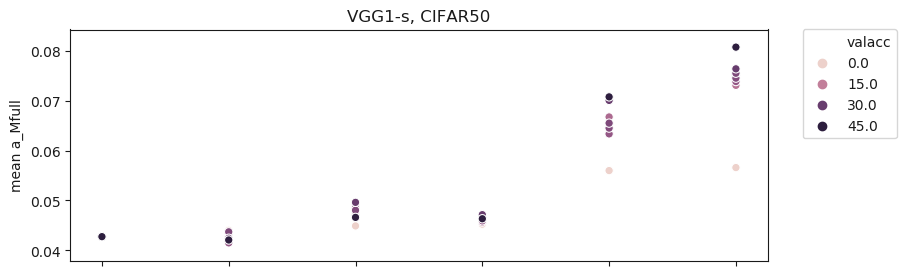

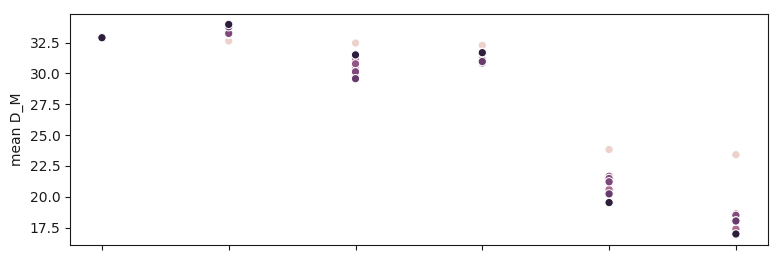

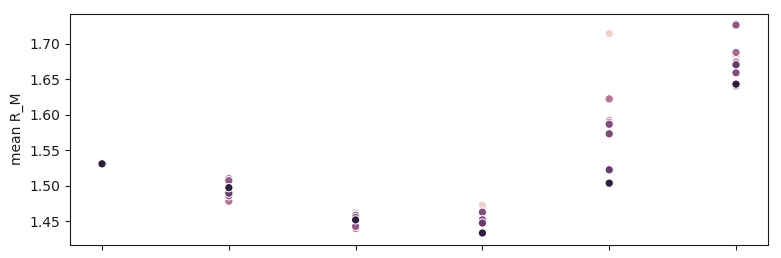

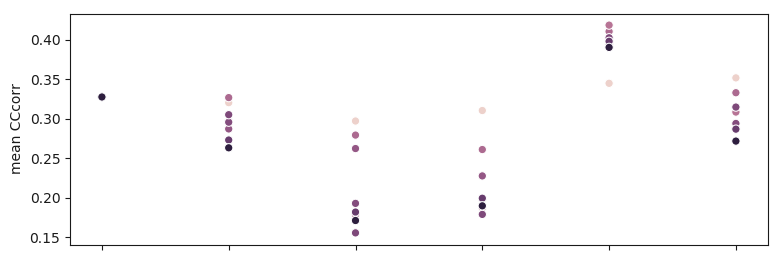

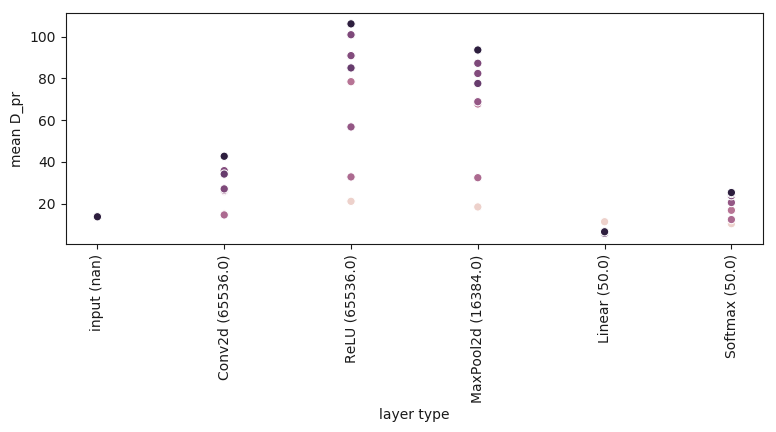

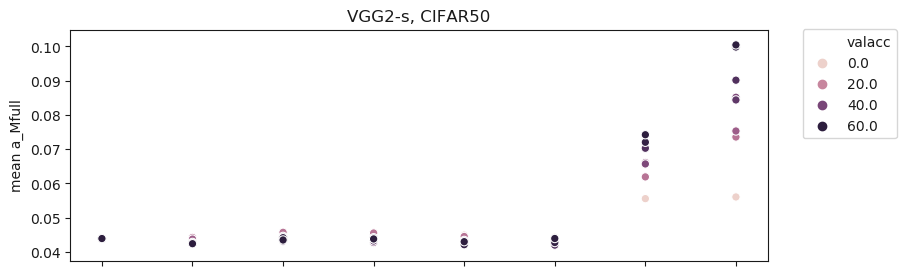

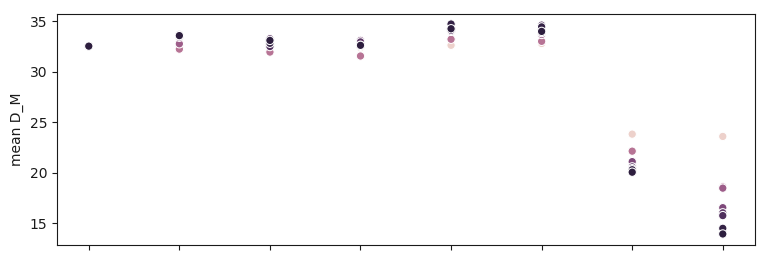

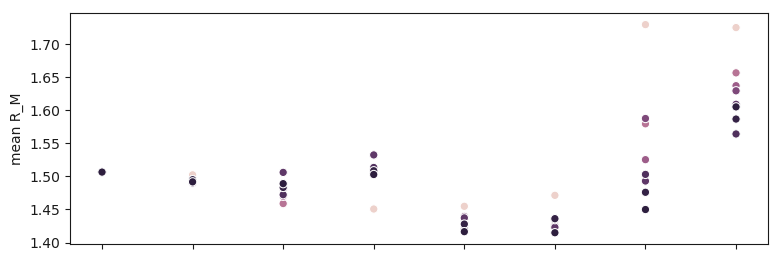

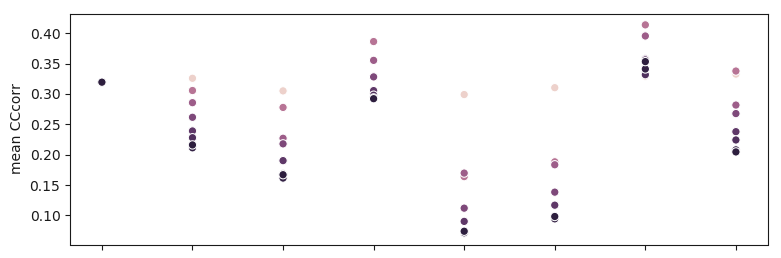

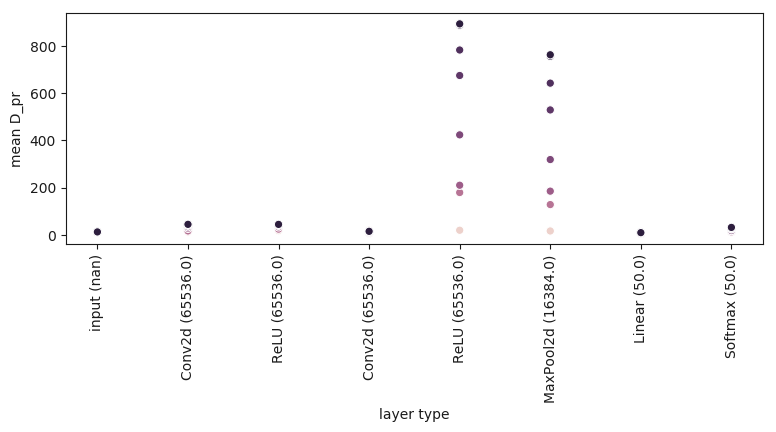

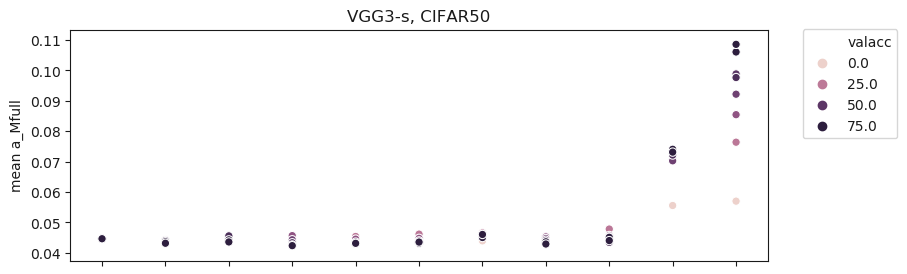

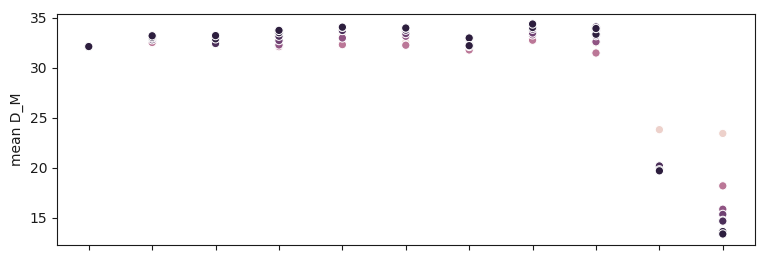

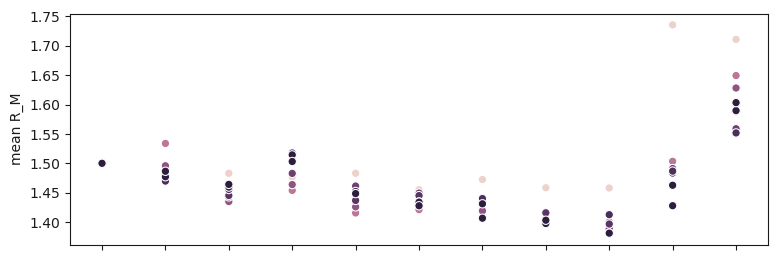

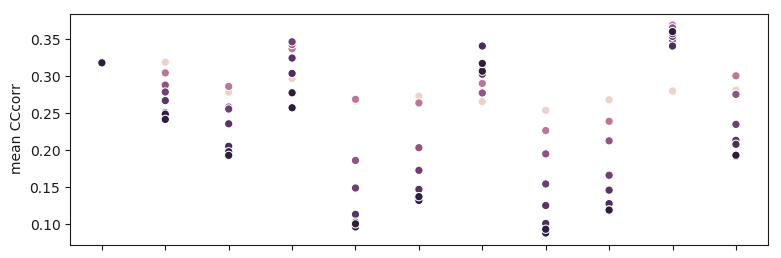

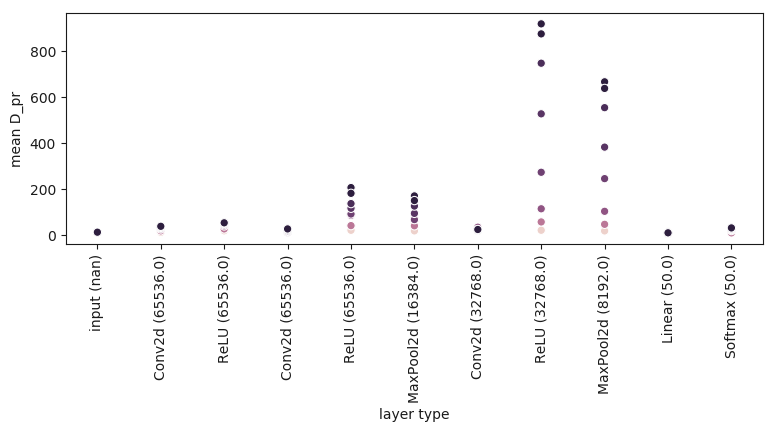

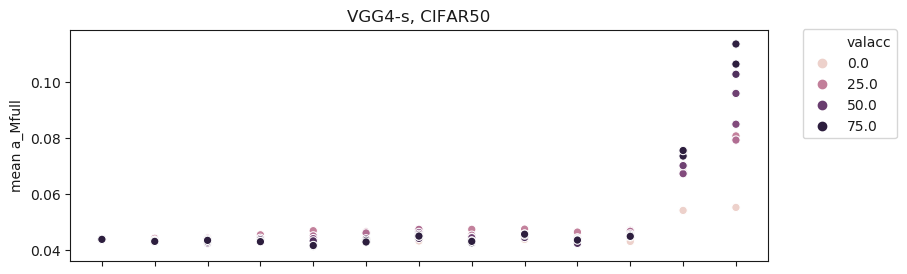

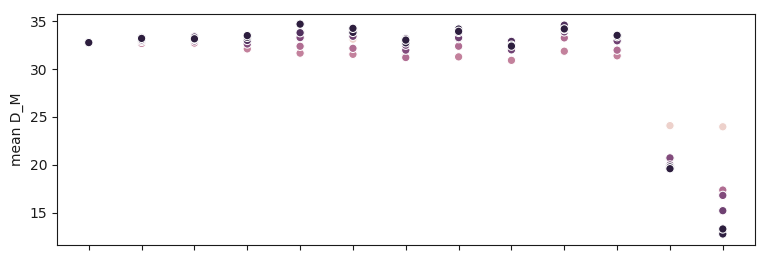

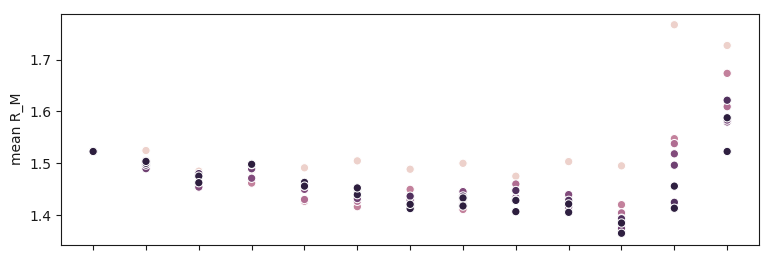

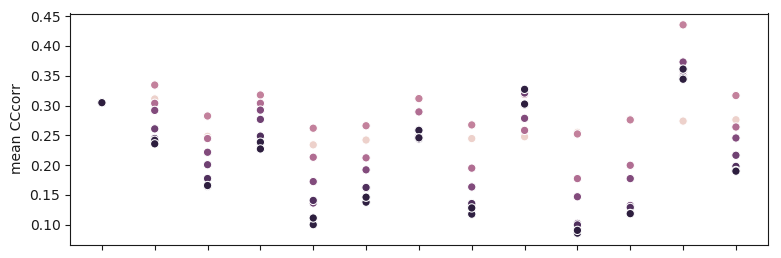

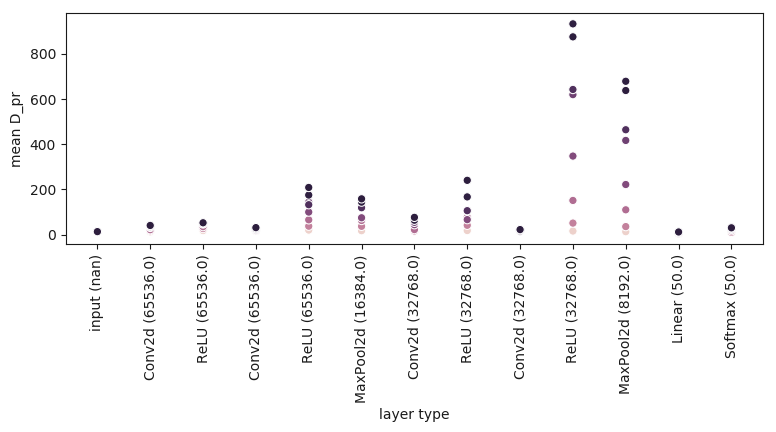

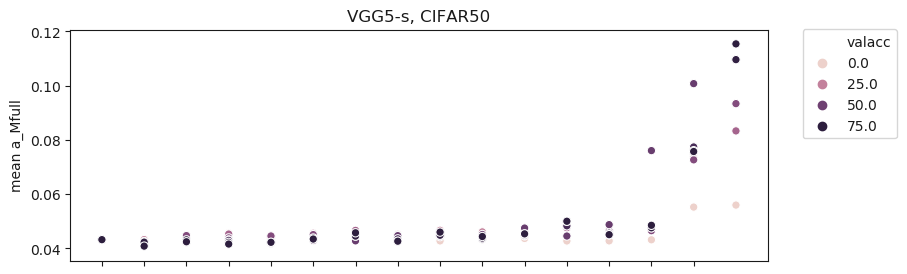

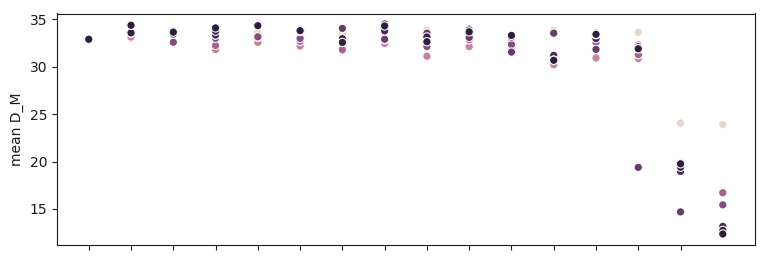

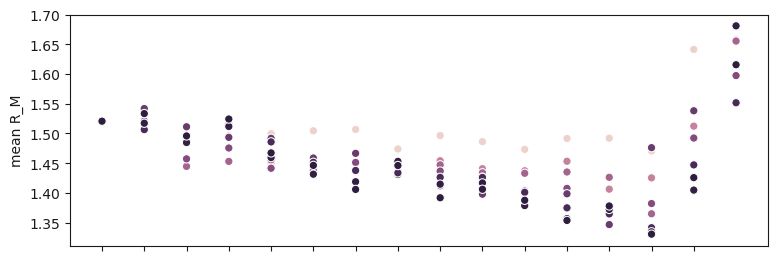

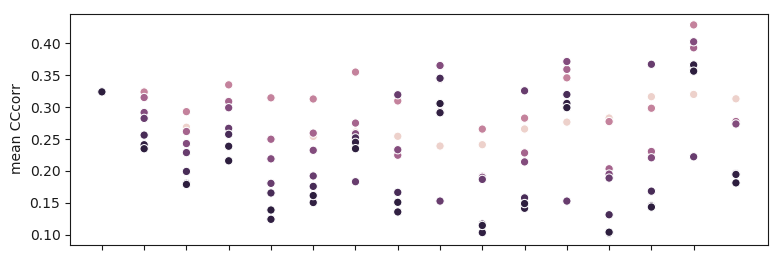

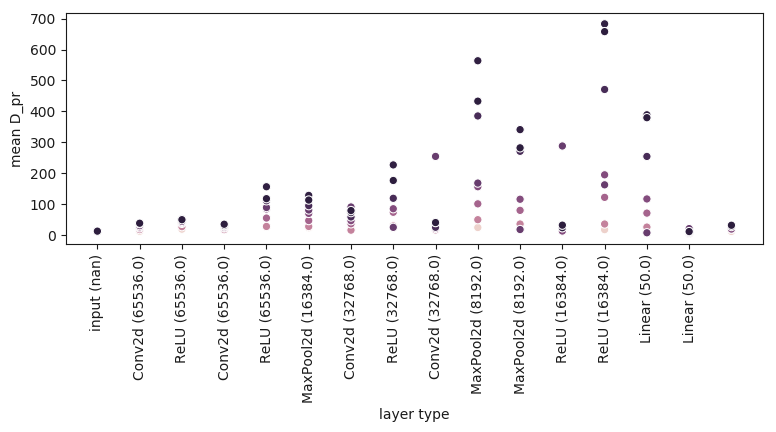

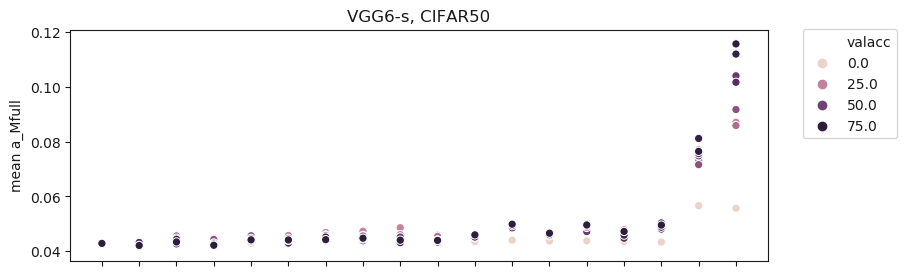

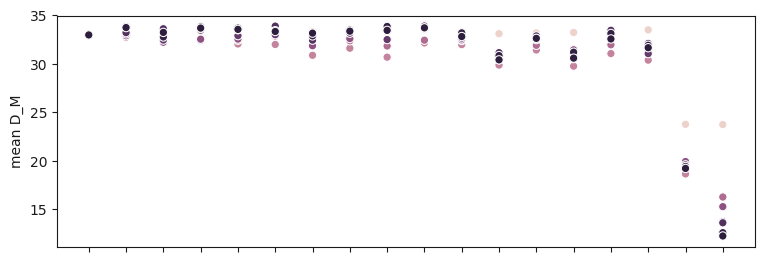

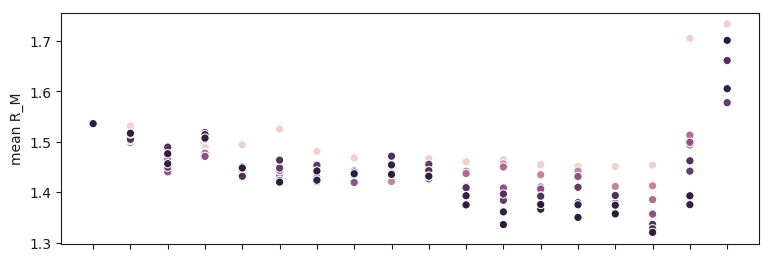

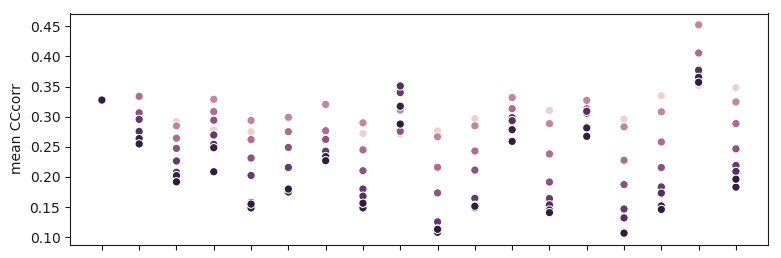

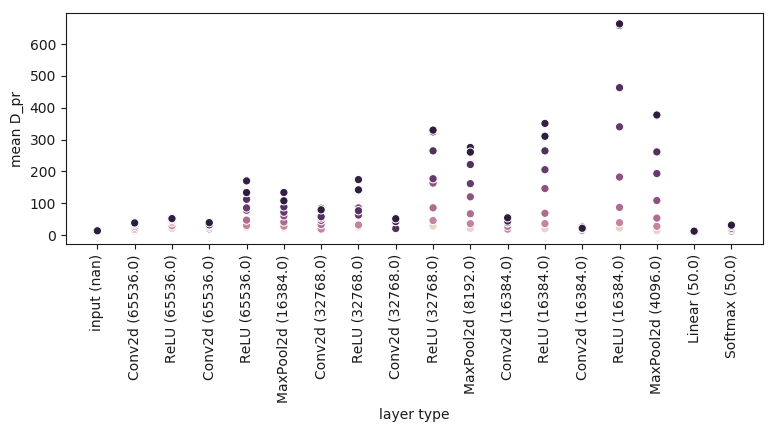

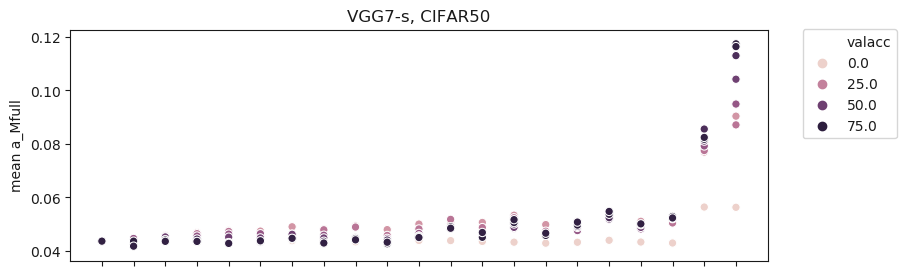

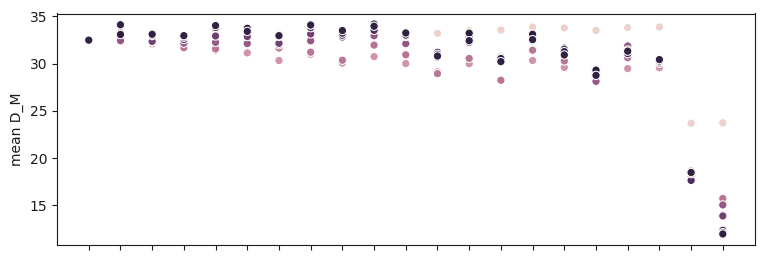

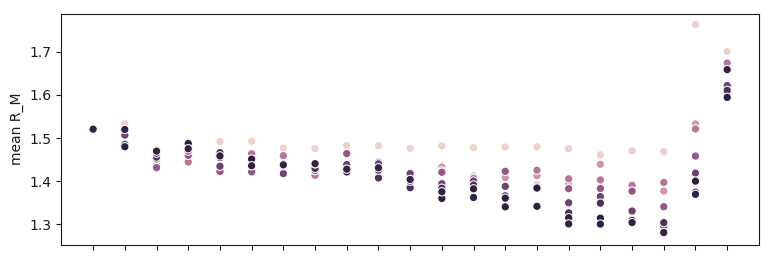

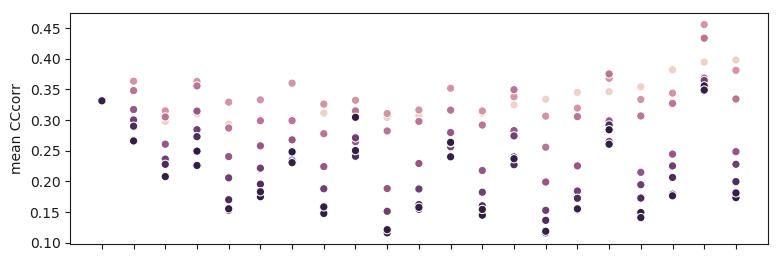

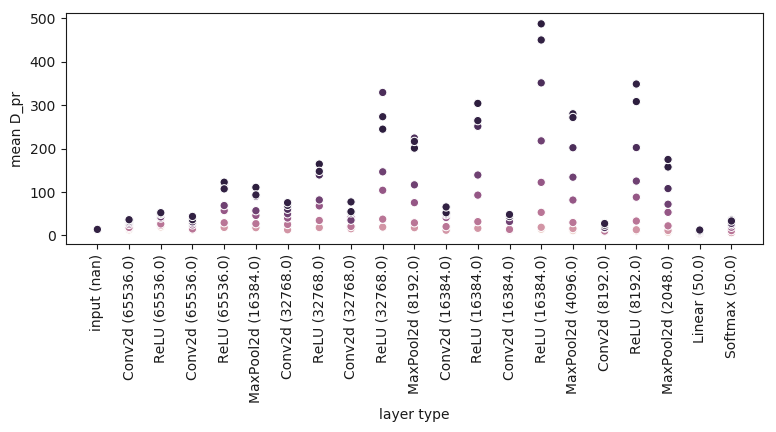

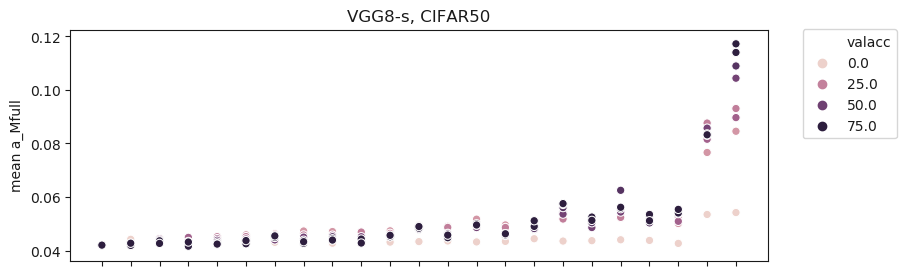

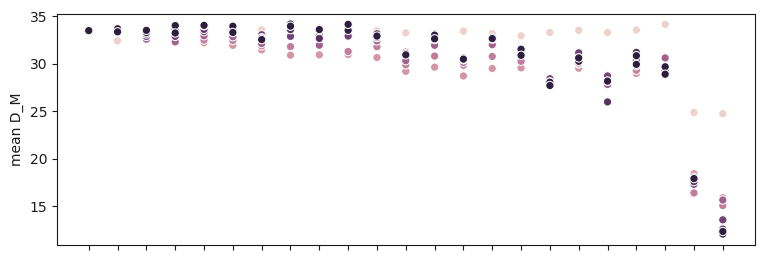

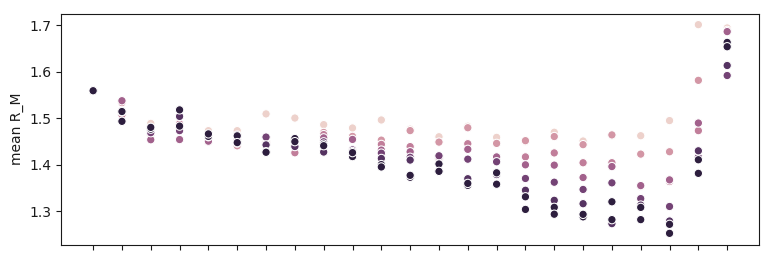

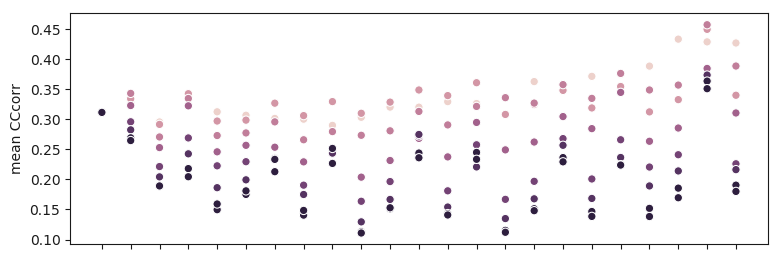

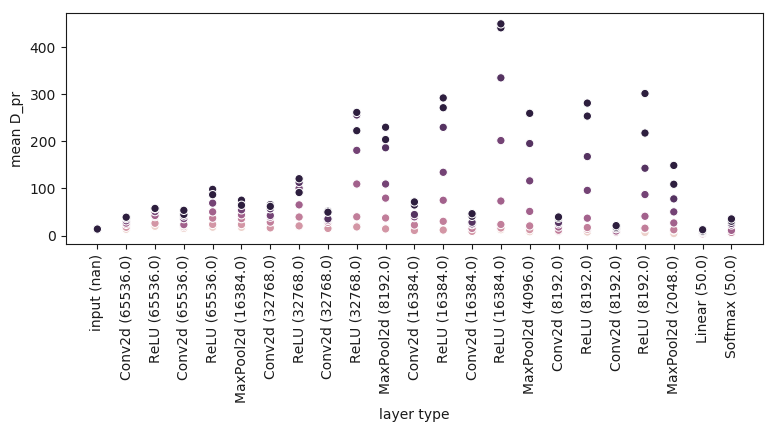

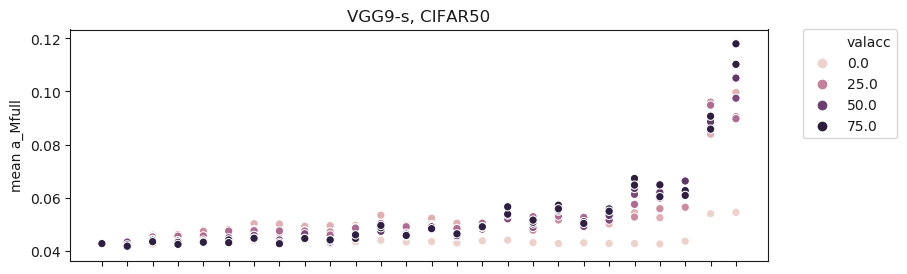

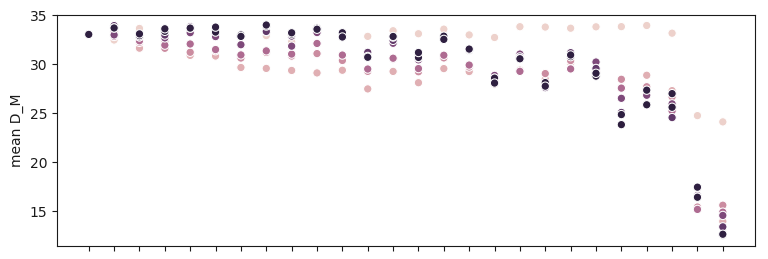

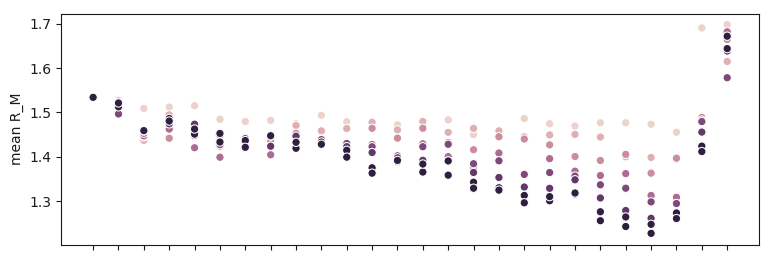

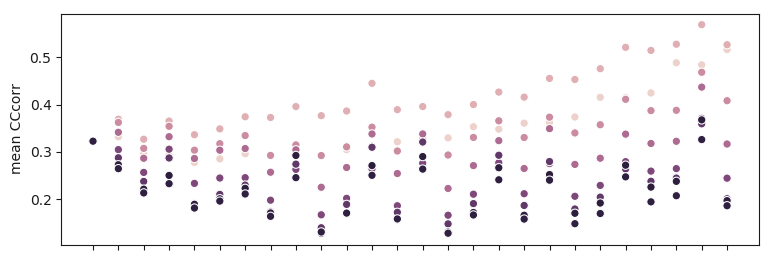

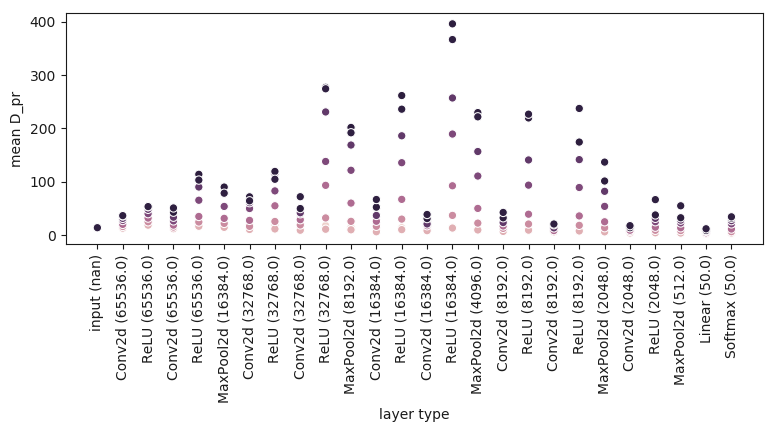

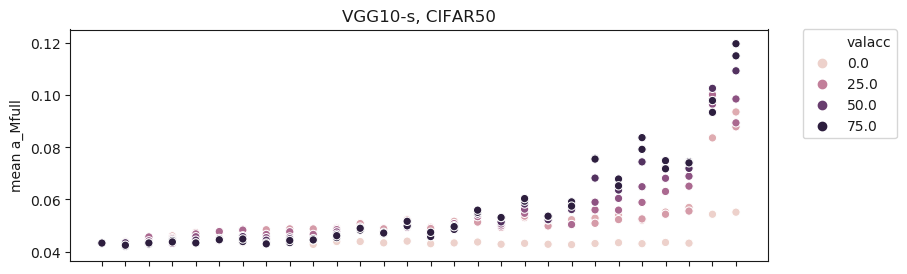

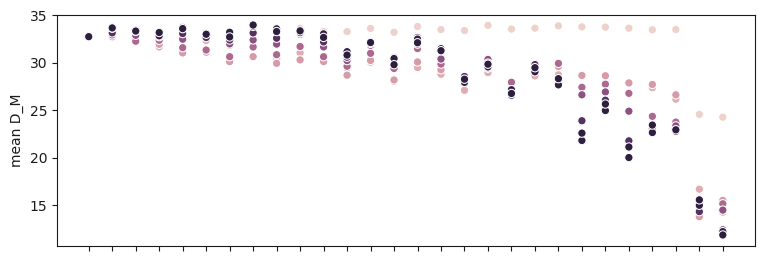

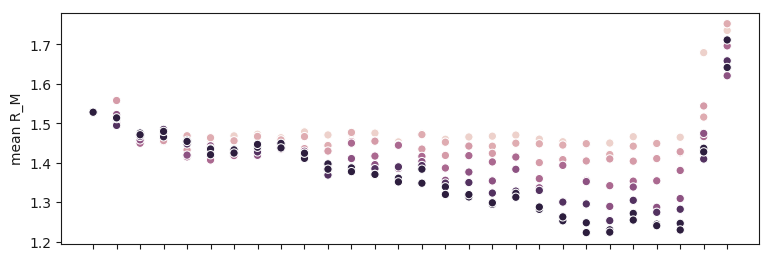

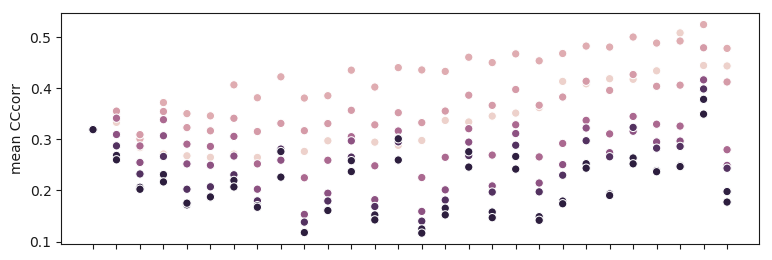

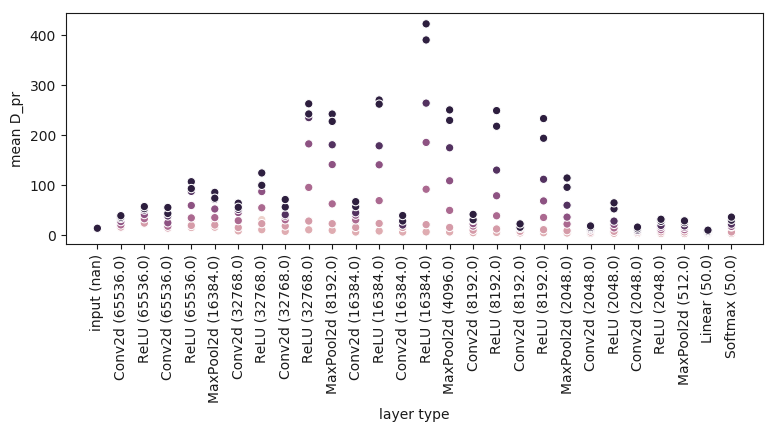

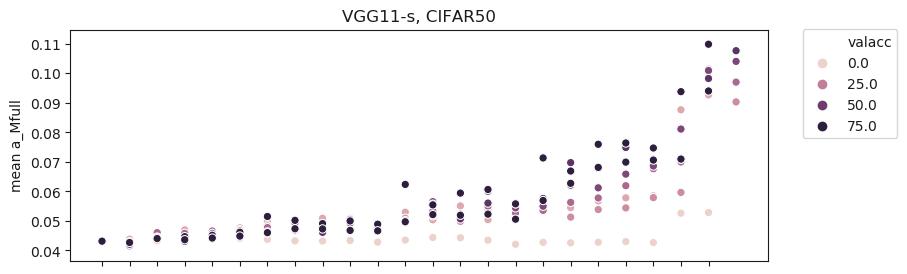

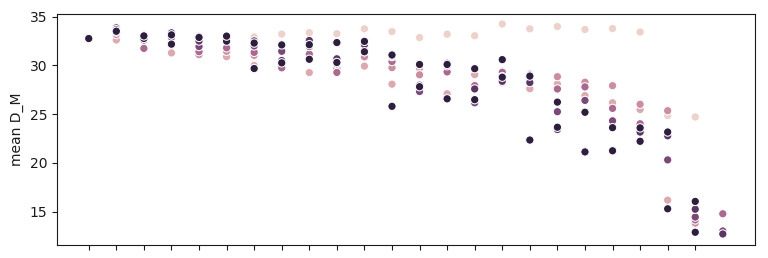

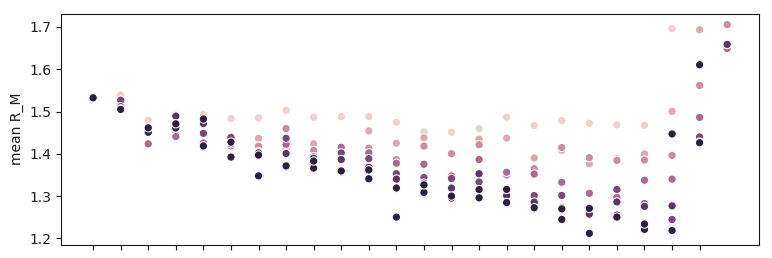

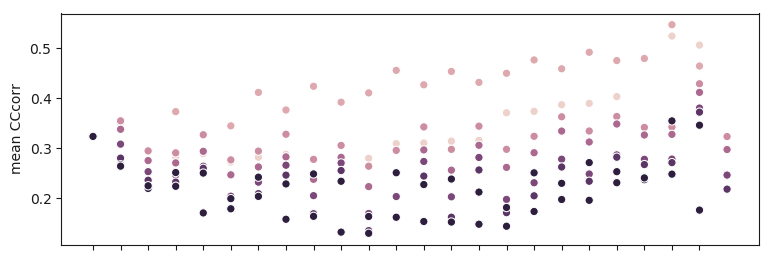

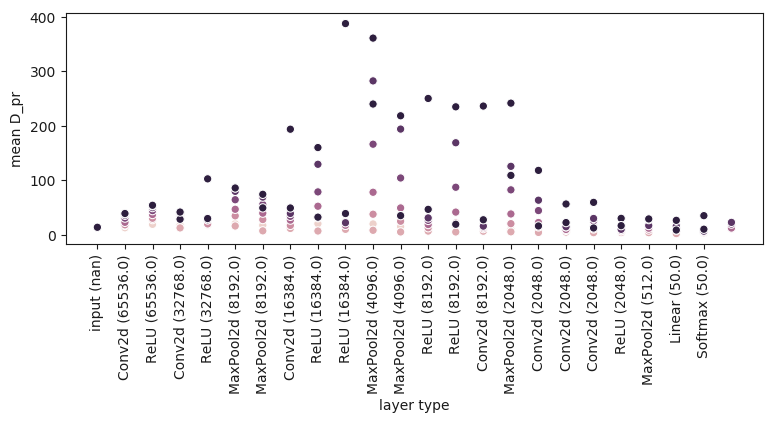

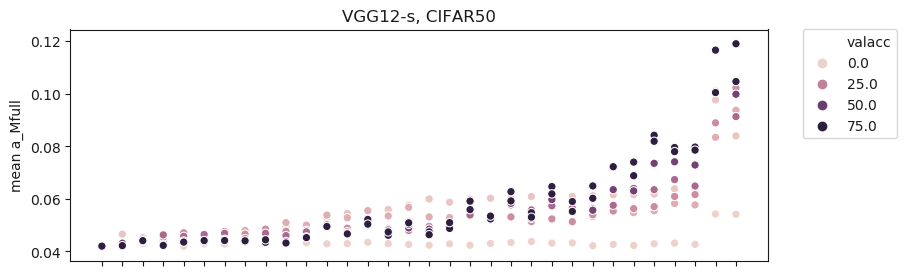

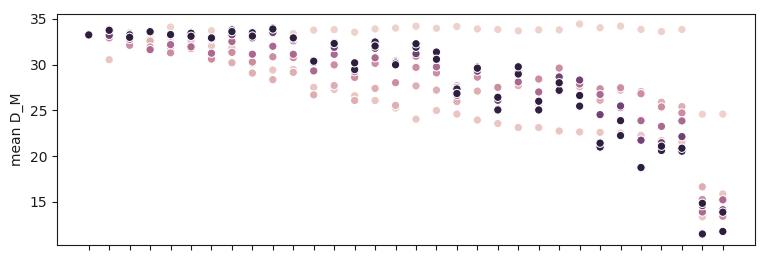

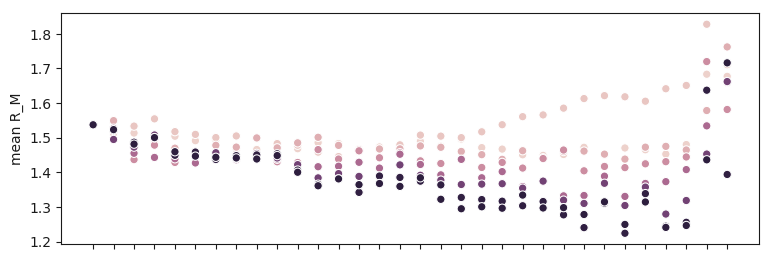

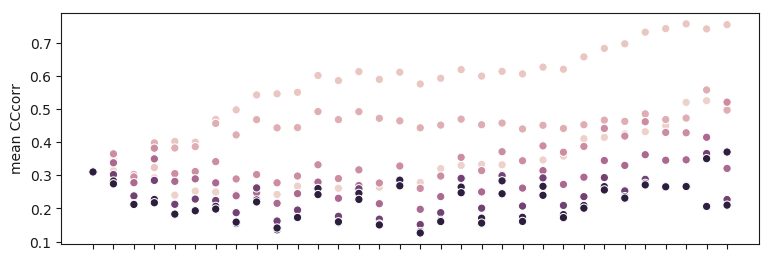

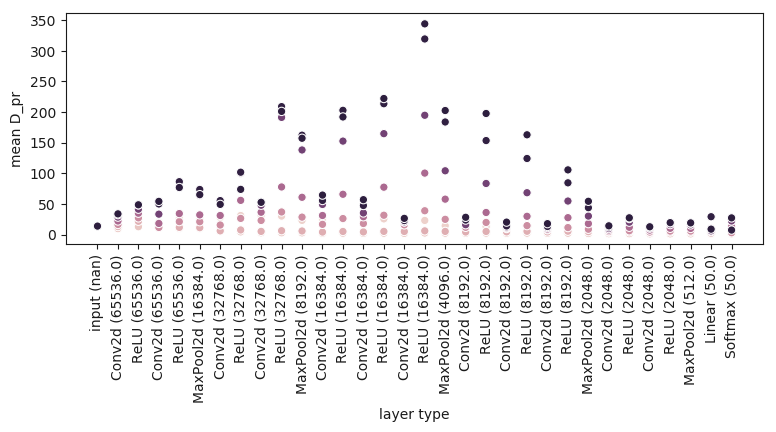

In [849]:
for i in range(1,13): 
    title = 'VGG{}-s, CIFAR50'.format(i)
    measures = ['a_Mfull_vec', 'D_M_vec', 'R_M_vec', 'CCcorr', 'D_pr']
#     measures = ['a_Mfull_vec']

    if i in [4,8,12]:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-exp_transfer-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    elif i in [11]:
        mani_dirs = [
            '../dump/exp_transfer/manifold-exp_transfer-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]
    else:
        mani_dirs = [
            '../dump/exp_transfer2/manifold-exp_transfer-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
        ]

    expand_input(mani_dirs)

    tags = [ 
        "seed 30 ep:" 
    ]

    df = multi_frame_constructor(mani_dirs, tags, measures)
#     df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
    df = add_loss(df,loss_df)

    df['tag'] = df['tag']+df['epoch'].astype(str)

    opts = {
        'dims':[9,3],
        'sortby': ['layer number','epoch'],
        'hue': 'valacc',
        'fix_legend':True
    }

    df['valacc'] = df['valacc'].round(2)#.astype('str')
    
    df_filtered = df[(df['imageset']=='train')]
#     df_filtered = df[(df['imageset']=='train')&(df['epoch']==8)]

    for j, measure in enumerate(measures):
        data, ax = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)
        if j > 0:
            ax.get_legend().remove()
            ax.set_title('')
        if j != len(measures)-1:
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.set_xlabel('')

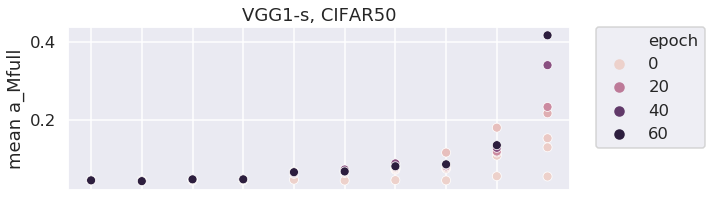

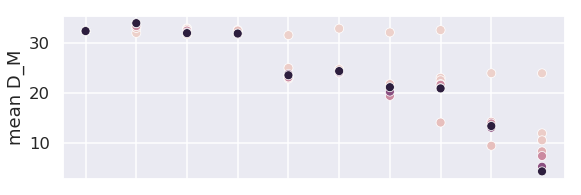

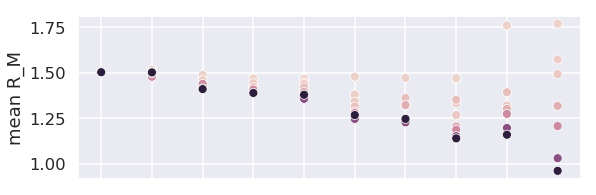

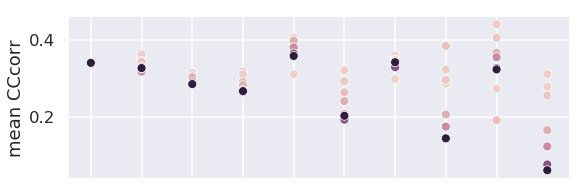

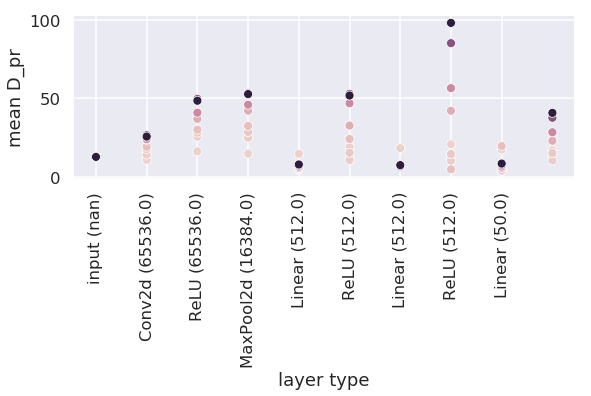

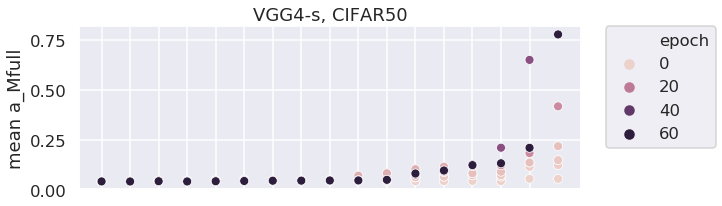

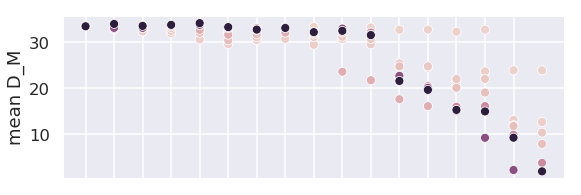

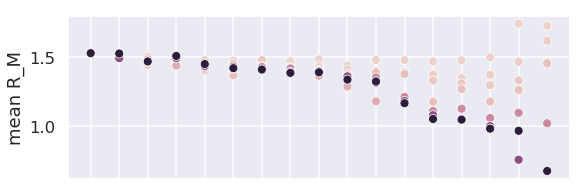

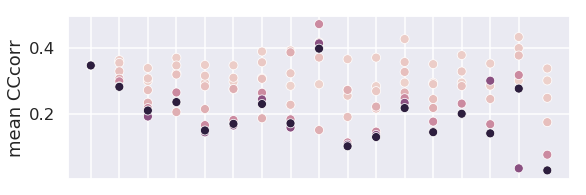

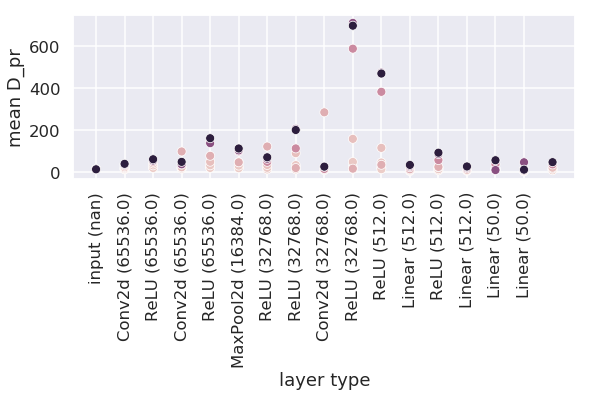

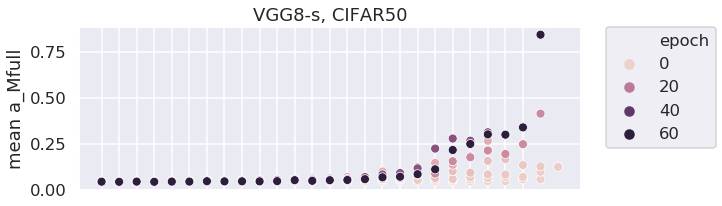

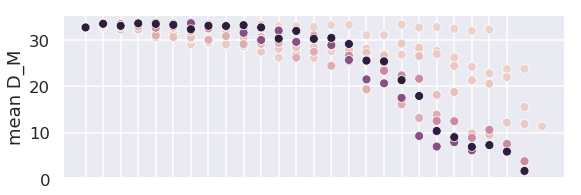

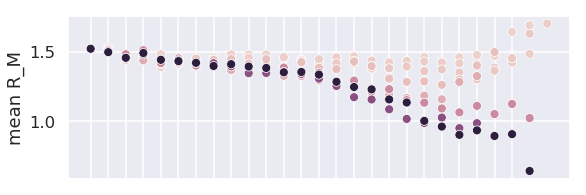

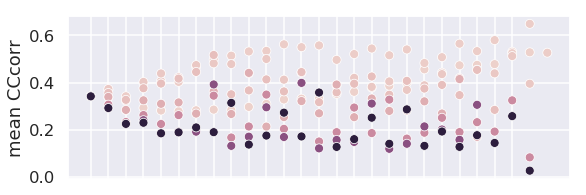

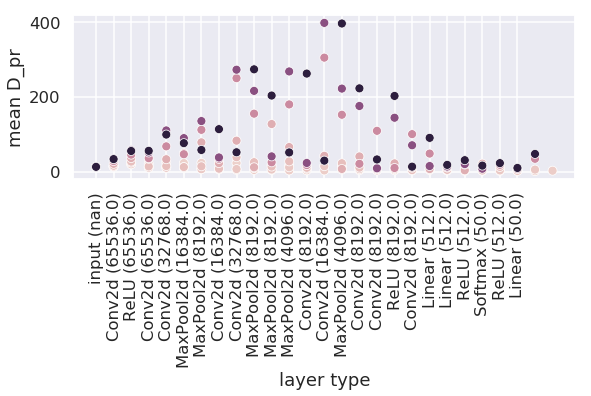

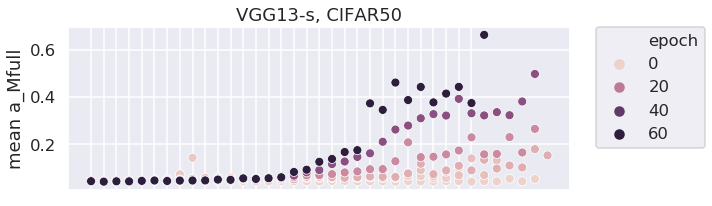

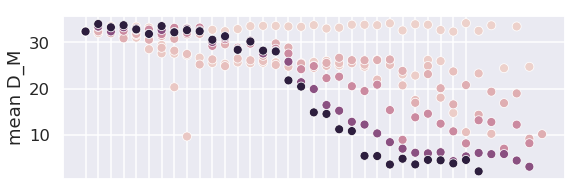

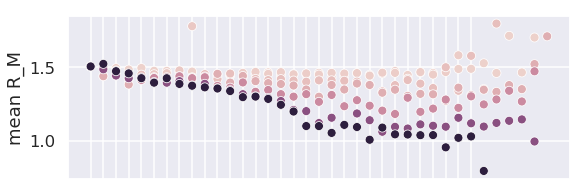

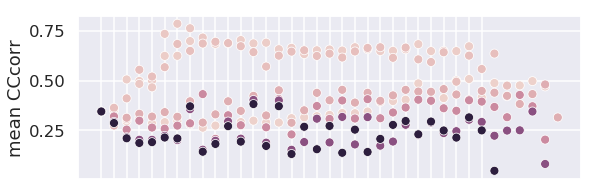

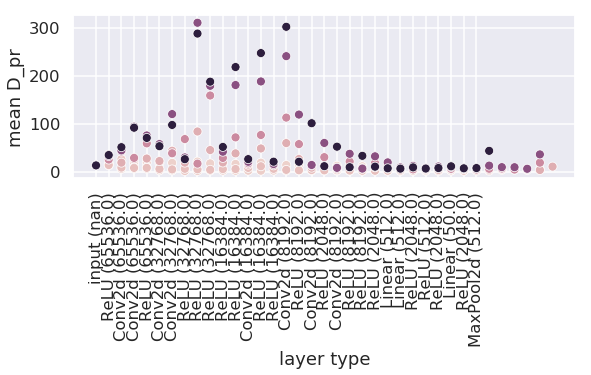

In [502]:
for i in [1,4,8,13]: 
    title = 'VGG{}-s, CIFAR50'.format(i)
    measures = ['a_Mfull_vec', 'D_M_vec', 'R_M_vec', 'CCcorr', 'D_pr']
#     measures = ['a_Mfull_vec']

#     if i in [4,8,12]:
#         mani_dirs = [
#             '../dump/exp_transfer/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
#         ]
#     else:
    mani_dirs = [
        '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}f-formatted_features-sort_random/'.format(i)
    ]

    expand_input(mani_dirs)

    tags = [ 
        "seed 30 ep:" 
    ]

    df = multi_frame_constructor(mani_dirs, tags, measures)
#     df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
#     df = add_loss(df,loss_df)
#     df['valacc'] = df['valacc'].round(2)#.astype('str')

    df['tag'] = df['tag']+df['epoch'].astype(str)

    opts = {
        'dims':[9,3],
        'sortby': ['layer number','epoch'],
        'hue': 'epoch',
        'fix_legend':True
    }

    
    
    df_filtered = df[(df['imageset']=='train')]
#     df_filtered = df[(df['imageset']=='train')&(df['epoch']==8)]

    for j, measure in enumerate(measures):
        data, ax = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)
        if j > 0:
            ax.get_legend().remove()
            ax.set_title('')
        if j != len(measures)-1:
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.set_xlabel('')

layers that show movement are lower dimensional... wondering if there could be an issue with sampling? if encoding is very sparse you could be missing the representation.

In [934]:
def colapse_conv_relu(delta_df):
    new_delta_df = pd.DataFrame()
    new_delta_df['measure'] = delta_df['measure']

    for i, key in enumerate(delta_df):
        if 'Conv' in key:
            new_delta_df['Conv-Relu_'+str(i+1)] = delta_df[key]+delta_df['ReLU_'+str(i+1)]
        elif 'ReLU' in key:
            pass
        elif 'Linear' in key:
            new_delta_df['Softmax_'+str(i+1)] = delta_df[key]+delta_df['Softmax_'+str(i+1)]
        elif 'Softmax' in key:
            pass
        else:
            new_delta_df[key] = delta_df[key]
            
    return new_delta_df

In [935]:
title = 'VGG10-s, CIFAR100'
measures = ['CCcorr']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_2-drop_0-dataset_CIFAR100-classes_50-arch_vgg3-formatted_features-sort_random/'
]

expand_input(mani_dirs)

tags = [ 
    "ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)

df = add_loss(df, loss_df)

df['tag'] = df['tag']+df['epoch'].astype(str)

opts = {
    'dims':[7,3],
    'sortby': ['layer number','epoch'],
    'hue': 'valacc',
    'fix_legend':True
}

df_filtered = df[(df['imageset']=='train')]

for measure in measures:
    data = display(df_filtered, 'layer number', 'value', measure, 'features',  title, opts=opts)

In [809]:
def expand_delta(initial_df, delta_df):
    recon = []
    recon.append(initial_df['initial'].values)
    for i, key in enumerate(delta_df):
        if i > 0:
            recon.append(recon[i-1]+delta_df[key])
    
    return np.array(recon)

def normalize_delta_df(initial_df, delta_df):
    measure_values = expand_delta(initial_df,delta_df)
    normalized_delta_df = delta_df.copy()
    for i, key in enumerate(delta_df):
        if i > 0:
            normalized_delta_df[key] = normalized_delta_df[key].values/np.abs(measure_values[i-1])

    return normalized_delta_df

('try seed:', 0)
success
('try seed:', 1)
success
('try seed:', 2)
success
('try seed:', 3)
success
('success for seeds:', [0, 1, 2, 3])


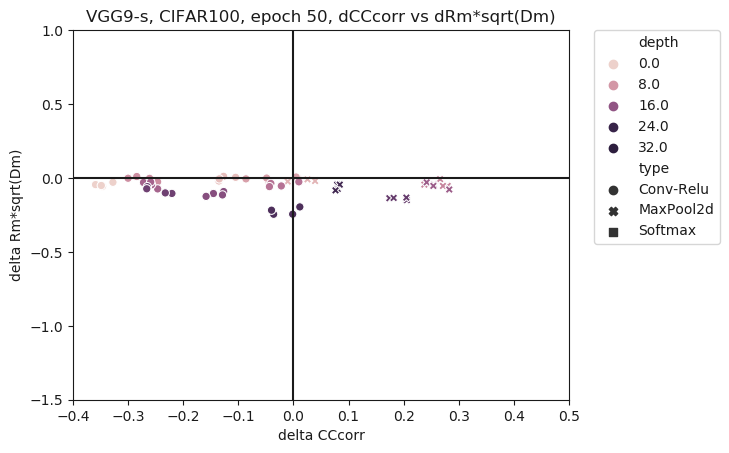

In [936]:
i = 9

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.4,.5]
vlines = [[-1.5,1],[-7,3],[-1.3,1.3]]

disp_measures = ['Rm*sqrt(Dm)']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df, initial_df = get_delta_frame(dir_template, 50, seeds=[0,5], expand_input_files=True, measures=measures, skip=[4], exclude=['-ep_0-','-ep_1-'], verbose=True)

delta_df = colapse_conv_relu(delta_df)
delta_df = normalize_delta_df(initial_df,delta_df)
for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('success for seeds:', [0, 1, 2, 3])


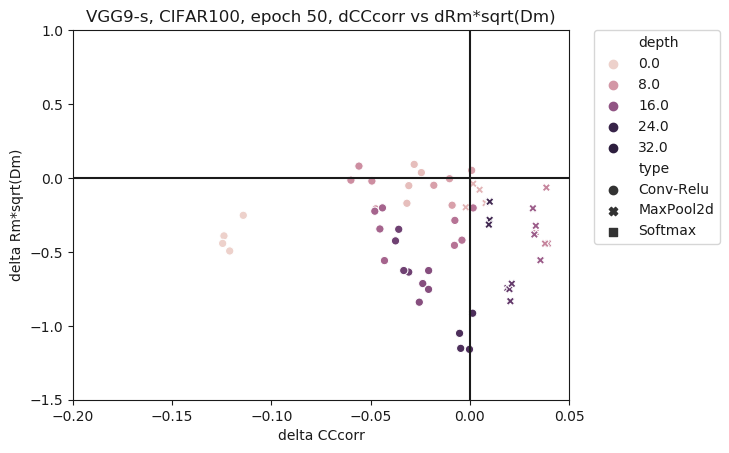

In [829]:
i = 9

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.2,.05]
vlines = [[-1.5,1],[-7,3],[-1.3,1.3]]

disp_measures = ['Rm*sqrt(Dm)']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df, initial_df = get_delta_frame(dir_template, 50, seeds=[0,5], expand_input_files=True, measures=measures, skip=[4], exclude=['-ep_0-','-ep_1-'], verbose=False)

delta_df = colapse_conv_relu(delta_df)

for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('try seed:', 0)
success
('try seed:', 1)
success
('try seed:', 3)
success
('try seed:', 4)
success
('try seed:', 5)
success
('success for seeds:', [0, 1, 3, 4, 5])


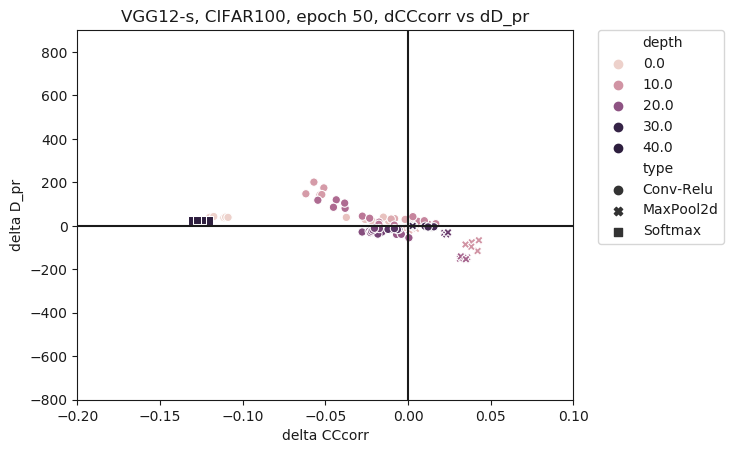

In [958]:
i = 12

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.2,.1]
vlines = [[-800,900],[-7,3],[-1.3,1.3]]

disp_measures = ['D_pr']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df, initial_df = get_delta_frame(dir_template, 50, seeds=[0,6], expand_input_files=True, measures=measures, skip=[2], exclude=['-ep_0-','-ep_1-'], verbose=True)

delta_df = colapse_conv_relu(delta_df)

for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('try seed:', 0)
success
('try seed:', 1)
success
('try seed:', 3)
success
('try seed:', 4)
success
('success for seeds:', [0, 1, 3, 4])


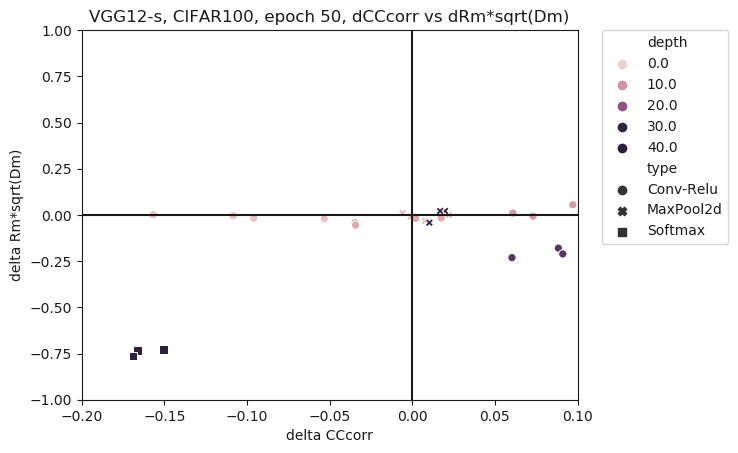

In [682]:
i = 12

title = 'VGG{}-s, CIFAR100'.format(i)
hline=[-.2,.1]
vlines = [[-1,1],[-7,3],[-1.3,1.3]]

disp_measures = ['Rm*sqrt(Dm)']

dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
delta_df = get_delta_frame(dir_template, 50, seeds=[0,5], normalized=True, expand_input_files=True, measures=measures, skip=[2], exclude=['-ep_0-','-ep_1-'], verbose=True)

delta_df = colapse_conv_relu(delta_df)

for x, vline in zip(disp_measures,vlines):
    y = 'CCcorr'
    xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
    plt.show()

('success for seeds:', [0, 1, 2, 3, 4])


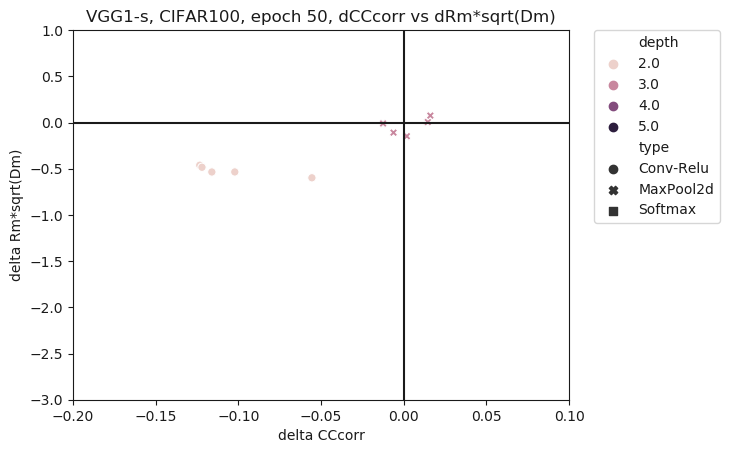

('success for seeds:', [0, 1, 2, 3, 4])


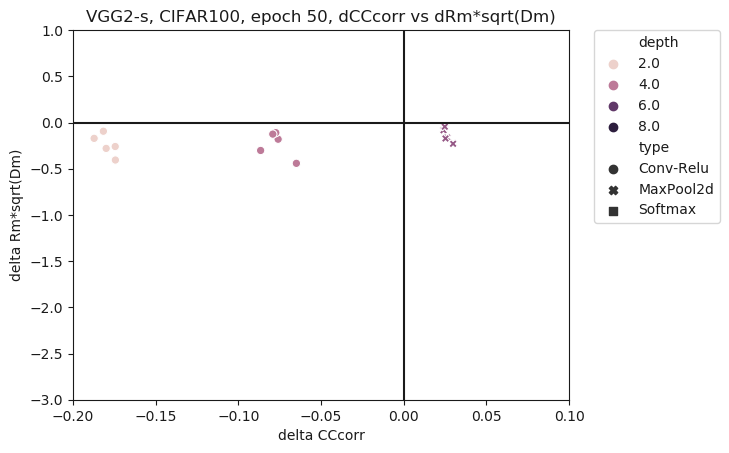

('success for seeds:', [0, 1, 2, 3, 4])


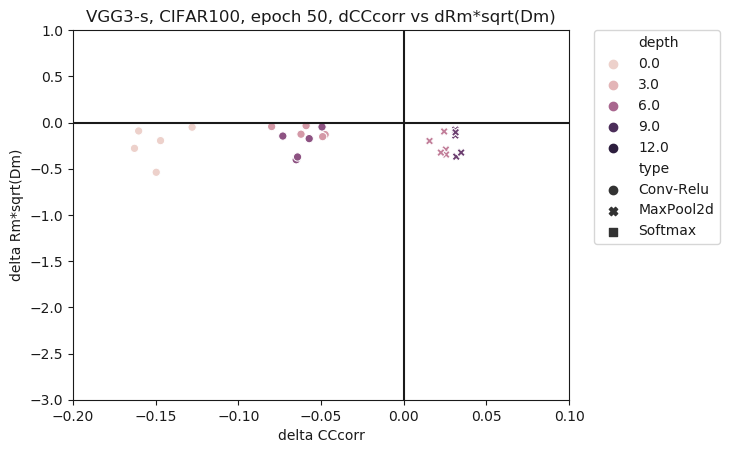

ValueError: operands could not be broadcast together with shapes (6,) (0,) 

In [510]:
for i in range(1,11):
    if i in [4,5,6,8]:
        pass
    else:
        title = 'VGG{}-s, CIFAR100'.format(i)
        hline=[-.2,.1]
        vlines = [[-3,1],[-10,3],[-1.3,1.3]]

        disp_measures = ['Rm*sqrt(Dm)']

        dir_template = '../dump/exp_transfer2/manifold-seed_{}-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format('{}', i)
        measures = ['D_M_vec','R_M_vec', 'a_M_vec', 'CCcorr', 'D_pr']
        delta_df = get_delta_frame(dir_template, 50, seeds=[0,5], expand_input_files=True, measures=measures, skip=[], exclude=['-ep_0-','-ep_1-'], verbose=False)

        delta_df = colapse_conv_relu(delta_df)

        for x, vline in zip(disp_measures,vlines):
            y = 'CCcorr'
            xy_df, ax = delta_plot(delta_df,y,x, title+', epoch 50', minmax=False, hline=hline, vline=vline)
            plt.show()

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
def get_xyz(df, measures, epoch):
    x = df[(df['measure']==measures[0])&(df['epoch']==epoch)]['value'].values
    a = df[(df['measure']==measures[0])&(df['epoch']==epoch)]['path'].values
    y = df[(df['measure']==measures[1])&(df['epoch']==epoch)]['value'].values
    b = df[(df['measure']==measures[1])&(df['epoch']==epoch)]['path'].values
    z = df[(df['measure']==measures[2])&(df['epoch']==epoch)]['value'].values
    c = df[(df['measure']==measures[2])&(df['epoch']==epoch)]['path'].values
    print(x.shape,y.shape,z.shape)
    check_path(a,b,c)
    
    return x,y,z

def get_xyz(df, measures, by_val, by='epoch'):
    x = df[(df['measure']==measures[0])&(df[by]==by_val)]['value'].values
    a = df[(df['measure']==measures[0])&(df[by]==by_val)]['path'].values
    y = df[(df['measure']==measures[1])&(df[by]==by_val)]['value'].values
    b = df[(df['measure']==measures[1])&(df[by]==by_val)]['path'].values
    z = df[(df['measure']==measures[2])&(df[by]==by_val)]['value'].values
    c = df[(df['measure']==measures[2])&(df[by]==by_val)]['path'].values
    print(x.shape,y.shape,z.shape)
    check_path(a,b,c)
    
    return x,y,z

def check_path(a,b,c):
    for i in range(len(a)):
        if (a[i]==b[i])&(a[i]==c[i]):
            pass
        else:
            print(a[i],b[i],c[i])

def get_ltype(df, measures, ltype):
    x = df[(df['measure']==measures[0])&(df['type']==ltype)]['value'].values
    a = df[(df['measure']==measures[0])&(df['type']==ltype)]['path'].values
    y = df[(df['measure']==measures[1])&(df['type']==ltype)]['value'].values
    b = df[(df['measure']==measures[1])&(df['type']==ltype)]['path'].values
    z = df[(df['measure']==measures[2])&(df['type']==ltype)]['value'].values
    c = df[(df['measure']==measures[2])&(df['type']==ltype)]['path'].values
    print(x.shape,y.shape,z.shape)
#     check_path(a,b,c)
    
    return x,y,z


In [876]:
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr', 'D_M_vec', 'R_M_vec']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'.format(i)
]

tags = [ 
    "seed 30 ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)
df = add_volume(df)
# df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
df = df[(df['type']!='Conv2d')&(df['type']!='Linear')]
df = add_loss(df, loss_df)
df = df.sort_values('layer number')

valaccs = df['valacc'].unique()
epochs = df['epoch'].unique()

sort = epochs.argsort()
epochs = epochs[sort]
valaccs = valaccs[sort]

data = []
traces = []
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr']
for i, epoch in enumerate(epochs):
    x,y,z = get_xyz(df, measures, epoch)
    data.append([x,y,z])
    traces.append(go.Scatter3d(
        name = 'epoch: {}, val acc: {}'.format(epoch, valaccs[i]),
        x=x,
        y=y,
        z=z,
#         mode = 'lines',
        mode = 'lines+markers',
        marker = {
            'color':'rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            'symbol':'circle',
            'size':2,
            'opacity':0.5
        },
        line=dict(
            color='rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            width=5
#             opacity=.5
        )
    ))

data = np.array(data)

traces.append(go.Scatter3d(
    name = 'Pixels',
    x=data[:,0,0],
    y=data[:,1,0],
    z=data[:,2,0],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='circle-open',
        size=4,
        line=dict(
            width=6
        ),
        opacity=1
    )
))

traces.append(go.Scatter3d(
    name = 'Softmax',
    x=data[:,0,-1],
    y=data[:,1,-1],
    z=data[:,2,-1],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='diamond',
        size=5,
        opacity=.8
    )
))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Capacity'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='phase-space-with-layer-types')

((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))


In [14]:
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr', 'D_M_vec', 'R_M_vec']
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_0-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'
]

tags = [ 
    "seed 30 ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)
df = add_volume(df)
# df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='MaxPool2d')]
df = add_loss(df, loss_df)
df = df.sort_values('layer number')

valaccs = df['valacc'].unique()
epochs = df['epoch'].unique()

sort = epochs.argsort()
epochs = epochs[sort]
valaccs = valaccs[sort]
epochs, valaccs

data = []
traces = []
measures = ['CCcorr', 'Rm*sqrt(Dm)', 'D_pr']
for i, epoch in enumerate(epochs):
    x,y,z = get_xyz(df, measures, epoch)
    data.append([x,y,z])
    traces.append(go.Scatter3d(
        name = 'epoch: {}, val acc: {}'.format(epoch, valaccs[i]),
        x=x,
        y=y,
        z=z,
#         mode = 'lines',
        mode = 'lines+markers',
        marker = {
            'color':'rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            'symbol':'circle',
            'size':2,
            'opacity':0.5
        },
        line=dict(
            color='rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            width=5
#             opacity=.5
        )
    ))

data = np.array(data)

traces.append(go.Scatter3d(
    name = 'Pixels',
    x=data[:,0,0],
    y=data[:,1,0],
    z=data[:,2,0],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='circle-open',
        size=4,
        line=dict(
            width=6
        ),
        opacity=1
    )
))

traces.append(go.Scatter3d(
    name = 'Softmax',
#     name = 'Last Feature',
    x=data[:,0,-1],
    y=data[:,1,-1],
    z=data[:,2,-1],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='diamond',
        size=5,
        opacity=.8
    )
))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Rm*sqrt(Dm)'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='relus-Rm*sqrt(Dm)_CCcorr_PR')

((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))
((12,), (12,), (12,))


In [929]:
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr', 'D_M_vec', 'R_M_vec']
blocks = [1, 2, 4, 6, 8, 10, 12]
mani_dirs = [
    '../dump/exp_transfer2/manifold-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg{}-formatted_features-sort_random/'.format(i)
    for i in blocks
]

tags = [ 
    "seed 30 ep:" 
     for i in blocks
]

df = multi_frame_constructor(mani_dirs, tags, measures)
df = add_volume(df)
df = df[(df['type']!='Conv2d')&(df['type']!='Linear')]
df = df[(df['epoch']==50)]
df = add_loss(df, loss_df)
df = df.sort_values('layer number')

archs = df['arch'].unique()

valaccs = []
for arch in archs:
    valaccs.append(df[df['arch']==arch]['valacc'].unique()[0])
valaccs = np.array(valaccs)

sort = valaccs.argsort()
valaccs = valaccs[sort]
archs = archs[sort]

data = []
traces = []
measures = ['CCcorr', 'Rm*sqrt(Dm)', 'D_pr']
for i, arch in enumerate(archs):
    x,y,z = get_xyz(df, measures, arch, by='arch')
    data.append([x,y,z])
    traces.append(go.Scatter3d(
        name = 'Arch: {}, Val acc: {}'.format(arch, valaccs[i]),
        x=x,
        y=y,
        z=z,
#         mode = 'lines',
        mode = 'lines+markers',
        marker = {
            'color':'rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            'symbol':'circle',
            'size':2,
            'opacity':0.5
        },
        line=dict(
            color='rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            width=5
#             opacity=.5
        )
    ))

data = np.array(data)

pixels = np.array([[l2[0] for l2 in l1] for l1 in data])
softmax = np.array([[l2[-1] for l2 in l1] for l1 in data])

traces.append(go.Scatter3d(
    name = 'Pixels',
    x=pixels[:,0],
    y=pixels[:,1],
    z=pixels[:,2],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='circle-open',
        size=4,
        line=dict(
            width=6
        ),
        opacity=1
    )
))

traces.append(go.Scatter3d(
    name = 'Softmax',
#     name = 'Last Feature',
    x=softmax[:,0],
    y=softmax[:,1],
    z=softmax[:,2],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='diamond',
        size=5,
        opacity=.8
    )
))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Rm*sqrt(Dm)'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='multi_arch_SM-Rm*sqrt(Dm)_CCcorr_PR')

((4,), (4,), (4,))
((5,), (5,), (5,))
((8,), (8,), (8,))
((17,), (17,), (17,))
((14,), (14,), (14,))
((19,), (19,), (19,))
((11,), (11,), (11,))


In [863]:
measures = ['CCcorr', 'a_Mfull_vec', 'D_pr', 'D_M_vec', 'R_M_vec']
mani_dirs = [
    '../dump/exp_transfer2/manifold-exp_transfer-seed_1-drop_0-dataset_CIFAR100-classes_50-arch_vgg10-formatted_features-sort_random/'.format(i)
]

tags = [ 
    "seed 30 ep:" 
]

df = multi_frame_constructor(mani_dirs, tags, measures)
df = add_volume(df)
# df = df[(df['type']!='Conv2d')&(df['type']!='Linear')&(df['type']!='Softmax')]
df = df[(df['type']!='Conv2d')&(df['type']!='Linear')]
df = add_loss(df, loss_df)
df = df.sort_values('layer number')

valaccs = df['valacc'].unique()
epochs = df['epoch'].unique()

sort = epochs.argsort()
epochs = epochs[sort]
valaccs = valaccs[sort]
epochs, valaccs

data = []
traces = []
measures = ['CCcorr', 'Rm*sqrt(Dm)', 'D_pr']
for i, epoch in enumerate(epochs):
    x,y,z = get_xyz(df, measures, epoch)
    data.append([x,y,z])
    traces.append(go.Scatter3d(
        name = 'epoch: {}, val acc: {}'.format(epoch, valaccs[i]),
        x=x,
        y=y,
        z=z,
#         mode = 'lines',
        mode = 'lines+markers',
        marker = {
            'color':'rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            'symbol':'circle',
            'size':2,
            'opacity':0.5
        },
        line=dict(
            color='rgba({}, {}, {}, .9)'.format(140+valaccs[i],140-valaccs[i],140-valaccs[i]),
            width=5
#             opacity=.5
        )
    ))

data = np.array(data)

traces.append(go.Scatter3d(
    name = 'Pixels',
    x=data[:,0,0],
    y=data[:,1,0],
    z=data[:,2,0],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='circle-open',
        size=4,
        line=dict(
            width=6
        ),
        opacity=1
    )
))

traces.append(go.Scatter3d(
    name = 'Softmax',
#     name = 'Last Feature',
    x=data[:,0,-1],
    y=data[:,1,-1],
    z=data[:,2,-1],
    mode = 'markers',
    marker = dict(
        color='black',
        symbol='diamond',
        size=5,
        opacity=.8
    )
))

layout = go.Layout(
    scene = dict(
        xaxis = dict(
            title= 'Center Correlation'
        ),
        yaxis = dict(
            title= 'Rm*sqrt(Dm)'
        ),
        zaxis = dict(
            title= 'Participation Ratio'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='SM-Rm*sqrt(Dm)_CCcorr_PR_transfer')

((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
((17,), (17,), (17,))
